In [1]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import random as rand
matplotlib.style.use('ggplot')#style change
%matplotlib inline
pd.options.mode.chained_assignment = None #ignore warnings
pd.options.display.float_format = '{:.4f}'.format #display in non-scientific notation

Here we are going to modify some of the census data to represent the distribution of different races for each census tract. By loading in the files that the cleaned datasets were saved into, we can save a lot of cleaning work and dive into more analysis.

In [2]:
#Load in cleaned census tract income and census tract race datasets
cens_income = pd.read_csv("./Data/cleaned_income_data.csv")
cens_race = pd.read_csv("./Data/cleaned_race_data.csv")

#Creating percentages
cens_race['Percent White'] = (cens_race["White"].astype(float) / 
                                    cens_race['Total Population'].astype(float))
cens_race['Percent Black'] = (cens_race["Black"].astype(float) / 
                                    cens_race['Total Population'].astype(float))
cens_race['Percent American Indian/Alaska Native'] = (
        cens_race["American Indian and Alask Native"].astype(float) / 
                                    cens_race['Total Population'].astype(float))
cens_race['Percent Asian'] = (cens_race["Asian"].astype(float) /
                              cens_race['Total Population'].astype(float))
cens_race['Percent Native Hawaiian/Pacific Islander'] = (
    cens_race["Native Hawaiian and Other Pacific Islander"].astype(float) / 
                                    cens_race['Total Population'].astype(float))
cens_race['Percent Other'] = (cens_race["Other"].astype(float) / 
                              cens_race['Total Population'].astype(float))

#Create df called race_pct which only contains the percent columns
race_pct = cens_race[['Census Tract', 'Percent White', 'Percent Black', 
                      'Percent American Indian/Alaska Native', 'Percent Asian', 
                      'Percent Native Hawaiian/Pacific Islander', 'Percent Other', 
                      'Year']].drop_duplicates()
#drop missing data if there is any
race_pct.dropna(inplace=True)

#Create list of percent columns only for plotting purpooses later on
pct_cols = ['Percent White', 'Percent Black', 'Percent American Indian/Alaska Native', 
            'Percent Asian', 'Percent Native Hawaiian/Pacific Islander', 'Percent Other']


As mentioned before, our initial hypothesis is that the census tracts with the highest percentage of Black residents in 2010 would have the largest influx of White residents by 2018. In order to see the results of our hypothesis, we need to separate the racial makeup datasets into 2010 and 2018 such that the percentages can be compared.

In [3]:
#Make Datasets in 2010 and 2018 to calculate change:
race_in2010 = race_pct[race_pct['Year']==2010]
race_in2018 = race_pct[race_pct['Year']==2018]

race_in2010.set_index('Census Tract', inplace=True)
race_in2018.set_index('Census Tract', inplace=True)

## Initial Hypothesis — Visualization

Text(0, 0.5, 'Percentage')

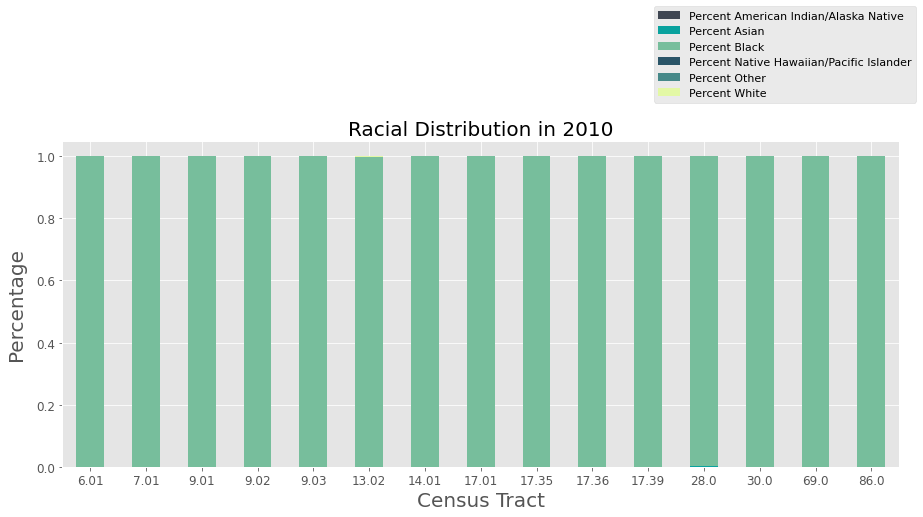

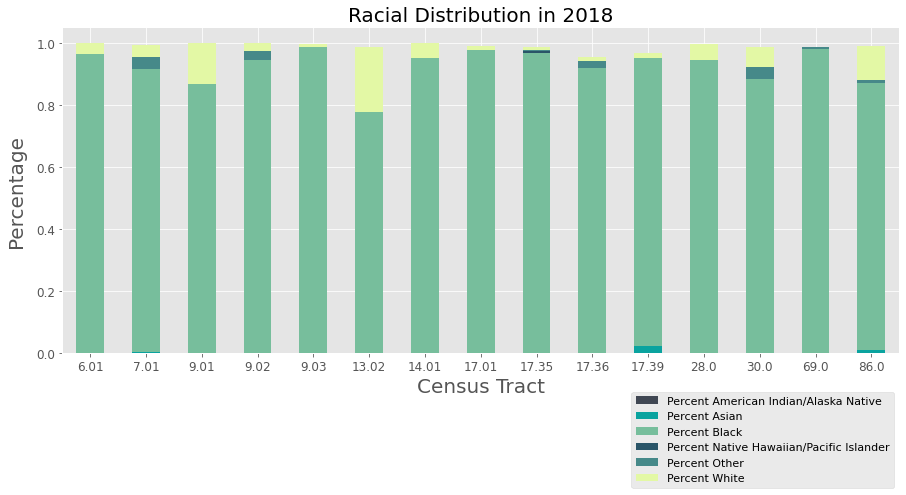

In [4]:
theme = [ '#404753', '#0AA39F','#77be9c',  '#2A5568', '#468989','#E3F8A5']

#Determine which census tracts had the highest pct of Black residents in 2010:
highest_pct_black = cens_race[cens_race['Year']==2010][['Census Tract', 
                        'Percent Black']].sort_values(by='Percent Black',ascending=False).head(15)
init_hyp = list(highest_pct_black['Census Tract'].to_dict().values())

#Create subsets for each of the years for comparison
subset_2010 = race_in2010.loc[init_hyp]
subset_2018 = race_in2018.loc[init_hyp]

#-------------------------------------------Plotting--------------------------------------------

#Create pivot tables and plot
ax1 = subset_2010.pivot_table(index='Census Tract', values=pct_cols).plot.bar(stacked=True, color=theme, 
                                    rot=0, figsize=(15,6), fontsize='large')
ax2 = subset_2018.pivot_table(index='Census Tract', values=pct_cols).plot.bar(stacked=True, color=theme, 
                                    fontsize='large', rot=0, figsize=(15,6))

#Format title/axis titles/legend

#ax1
ax1.set_title('Racial Distribution in 2010', fontsize=20)
ax1.legend(bbox_to_anchor=(.7, 1.1), fontsize=11)
ax1.set_xlabel('Census Tract', fontsize=20)
ax1.set_ylabel('Percentage', fontsize=20, labelpad=10)

#ax2
ax2.set_title('Racial Distribution in 2018', fontsize=20)
ax2.legend(bbox_to_anchor=(1, -.1), fontsize=11)
ax2.set_xlabel('Census Tract', fontsize=20)
ax2.set_ylabel('Percentage', fontsize=20, labelpad=10)

## Revised Hypothesis — Visualization
After looking at our initial hypothesis, we realized that the initial conditions we originally selected did not effectively predict the census tracts which would experience the highest positive percent change in White residents. That being said, we decided to modify our hypothesis to look at census tracts with a percentage of Black residents between 40% and 60%, rather than as close to 100% as possible. 

Text(0, 0.5, 'Percentage')

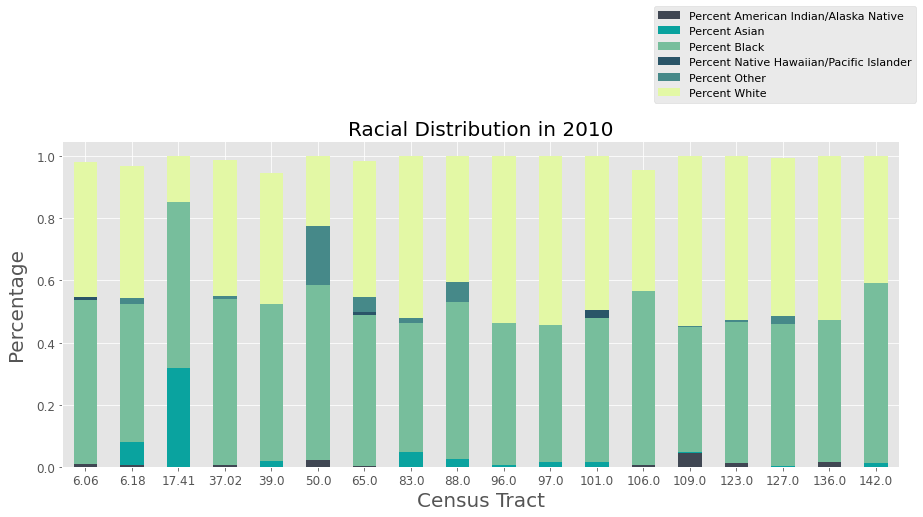

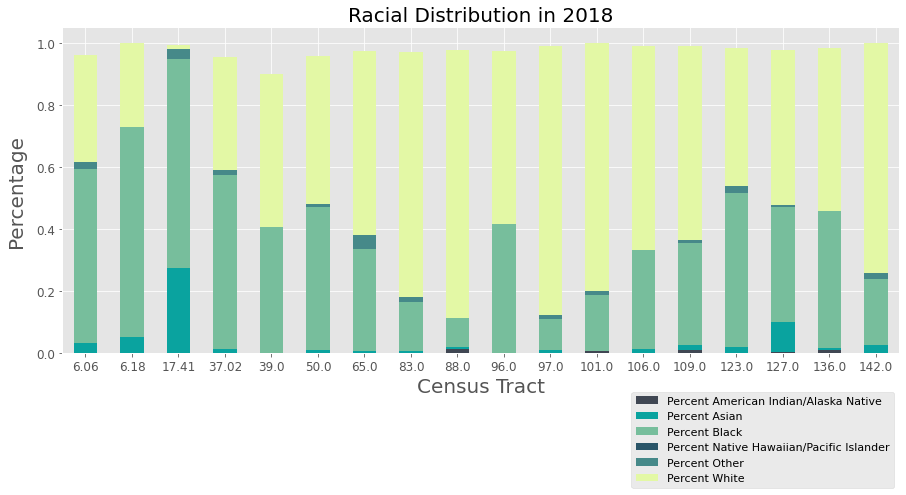

In [5]:
#Need census tract as column value to pull out the data we need, so reset index
race_in2010.reset_index(inplace=True)

#Create new list of census tracts whcih had between 40%-60% Black residents in 2010
rev_hyp = list(race_in2010[(race_in2010['Percent Black']<.6) 
                    & (race_in2010['Percent Black']>.4)]['Census Tract'].to_dict().values())

#Change back index to create subsets
race_in2010.set_index('Census Tract', inplace=True)

#Create subsets for each of the years for comparison
subset_2010 = race_in2010.loc[rev_hyp]
subset_2018 = race_in2018.loc[rev_hyp]

#-------------------------------------------Plotting--------------------------------------------

#Create pivot tables and plot
ax1 = subset_2010.pivot_table(index='Census Tract', values=pct_cols).plot.bar(stacked=True, color=theme, 
                                    rot=0, figsize=(15,6), fontsize='large')
ax2 = subset_2018.pivot_table(index='Census Tract', values=pct_cols).plot.bar(stacked=True, color=theme, 
                                    fontsize='large', rot=0, figsize=(15,6))

#Format title/axis titles/legend

#ax1
ax1.set_title('Racial Distribution in 2010', fontsize=20)
ax1.legend(bbox_to_anchor=(.7, 1.1), fontsize=11)
ax1.set_xlabel('Census Tract', fontsize=20)
ax1.set_ylabel('Percentage', fontsize=20, labelpad=10)

#ax2
ax2.set_title('Racial Distribution in 2018', fontsize=20)
ax2.legend(bbox_to_anchor=(1, -.1), fontsize=11)
ax2.set_xlabel('Census Tract', fontsize=20)
ax2.set_ylabel('Percentage', fontsize=20, labelpad=10)

## Hypothesis Testing — Visualization

Text(0, 0.5, 'Percentage')

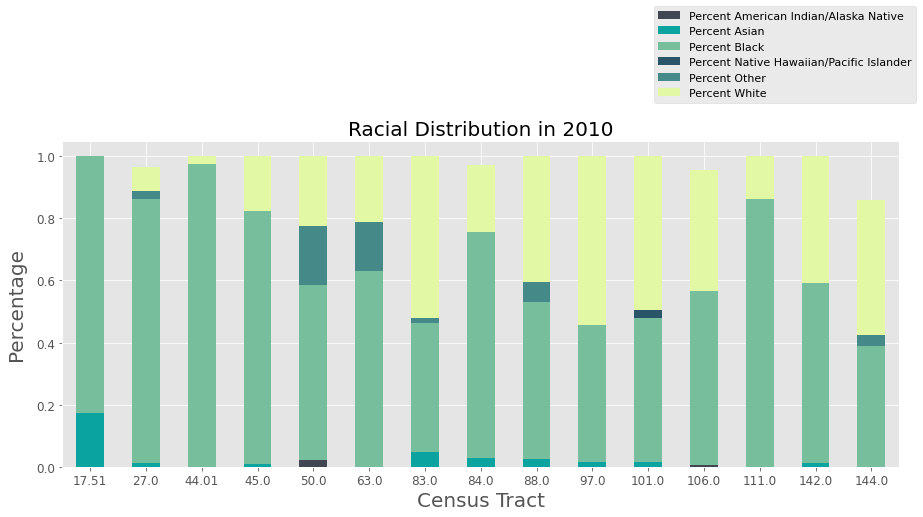

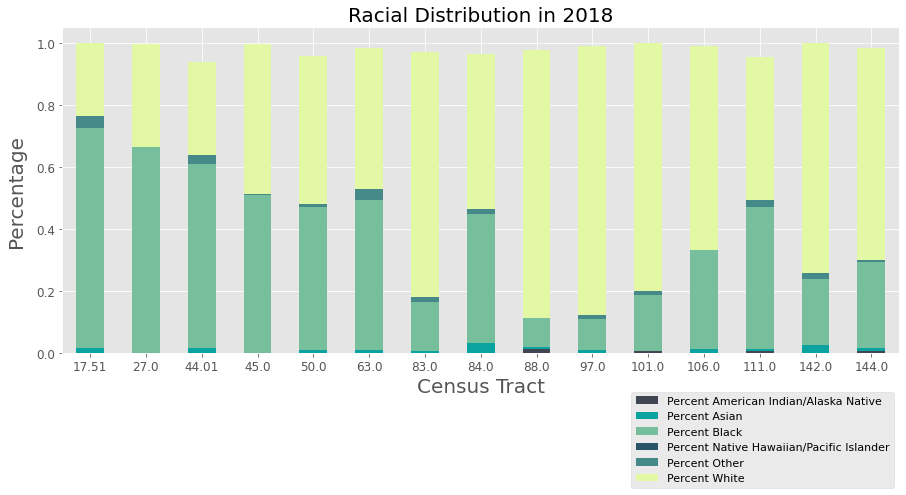

In [6]:
#Changing what I did before to take in census tract data: highest change in white population

#Calculate which neighborhoods had the biggest influx of white people between the two time periods:
change_white = race_pct[['Census Tract']].drop_duplicates()
change_white.set_index('Census Tract', inplace=True)

#Subtract most recent data from old data
change_white['Change in White'] = race_in2018['Percent White'] - race_in2010['Percent White']

#Save the 15 census tracts with the highest increase in population of white people
highest_change = list(
    change_white['Change in White'].sort_values(ascending=False).head(15).astype(str).to_dict().keys())

#Create subsets for each of the years for comparison
subset_2010 = race_in2010.loc[highest_change]
subset_2018 = race_in2018.loc[highest_change]

#-------------------------------------------Plotting--------------------------------------------

#Create pivot tables and plot
ax1 = subset_2010.pivot_table(index='Census Tract', values=pct_cols).plot.bar(stacked=True, color=theme, 
                                    rot=0, figsize=(15,6), fontsize='large')
ax2 = subset_2018.pivot_table(index='Census Tract', values=pct_cols).plot.bar(stacked=True, color=theme, 
                                    fontsize='large', rot=0, figsize=(15,6))

#Format title/axis titles/legend

#ax1
ax1.set_title('Racial Distribution in 2010', fontsize=20)
ax1.legend(bbox_to_anchor=(.7, 1.1), fontsize=11)
ax1.set_xlabel('Census Tract', fontsize=20)
ax1.set_ylabel('Percentage', fontsize=20, labelpad=10)

#ax2
ax2.set_title('Racial Distribution in 2018', fontsize=20)
ax2.legend(bbox_to_anchor=(1, -.1), fontsize=11)
ax2.set_xlabel('Census Tract', fontsize=20)
ax2.set_ylabel('Percentage', fontsize=20, labelpad=10)

Text(0, 0.5, 'Change in Percentage of White Residents between 2010-2018')

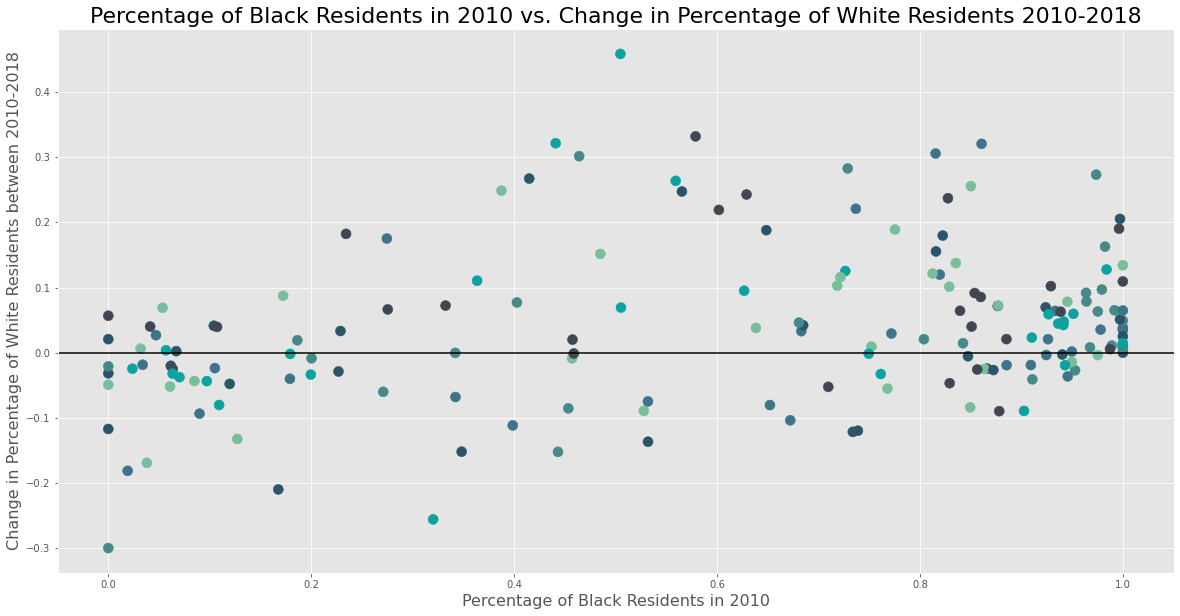

In [7]:
#SCATTERPLOT
colors = ['#3F738A', '#404753', '#0AA39F','#77be9c',  '#2A5568', '#468989']
change_white['Percent Black 2010'] = race_in2010['Percent Black']
change_white.plot.scatter(x='Percent Black 2010', y='Change in White', figsize=(20,10), c=colors*29,
                               s=100).axhline(y=0, color='black')
plt.title('Percentage of Black Residents in 2010 vs. Change in Percentage of White Residents 2010-2018',
         fontsize=22)
plt.xlabel('Percentage of Black Residents in 2010', fontsize=16)
plt.ylabel('Change in Percentage of White Residents between 2010-2018', fontsize=16)

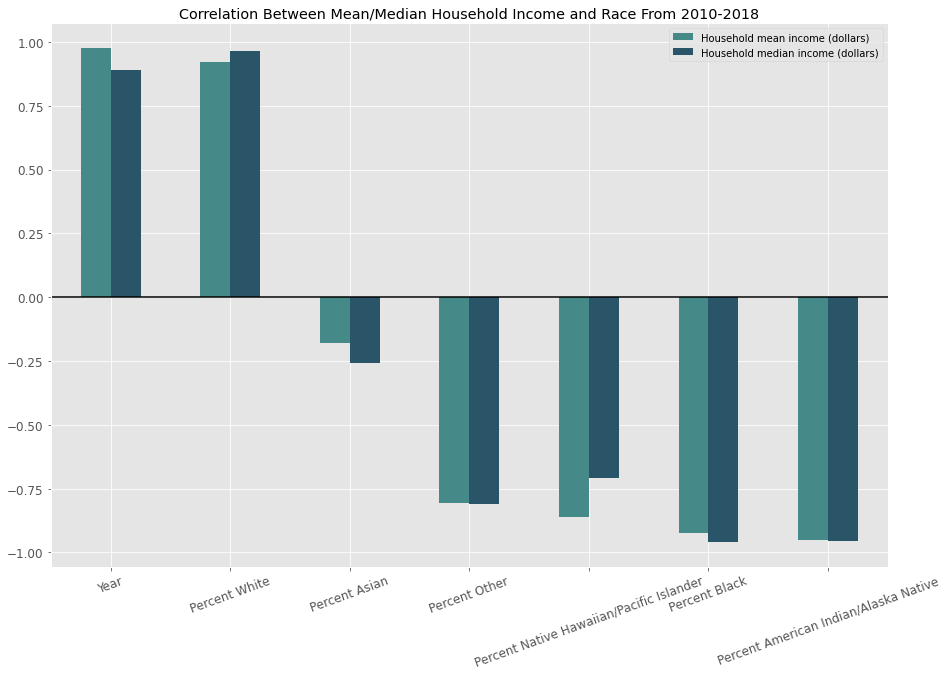

In [8]:
#Converting to census tract data for income correlation

race_forincome = race_pct.drop('Census Tract', axis=1)

cens_income = pd.read_csv("./Data/cleaned_income_data.csv")
cens_race = pd.read_csv("./Data/cleaned_race_data.csv")

mean_df = cens_income[['Household mean income (dollars)', 'Year']].dropna()
median_df = cens_income[['Household median income (dollars)', 'Year']].dropna()

mean_race = mean_df.merge(race_forincome, on='Year').drop_duplicates()
median_race = median_df.merge(race_forincome, on='Year').drop_duplicates()


pv = mean_race.pivot_table(index='Year', values=(pct_cols+['Household mean income (dollars)']), aggfunc=np.mean)
mean_race = pd.DataFrame(pv.to_records())
plotter = mean_race.corr()['Household mean income (dollars)']
plotter.drop('Household mean income (dollars)', inplace=True)

pv2 = median_race.pivot_table(index='Year', values=(pct_cols+['Household median income (dollars)']), aggfunc=np.mean)
median_race = pd.DataFrame(pv2.to_records())
plotter2 = median_race.corr()['Household median income (dollars)']
plotter2.drop('Household median income (dollars)', inplace=True)

order = list(plotter.sort_values(ascending=False).index)
plotter = pd.concat([plotter, plotter2], axis=1)
plotter.reindex(order).plot.bar(
                    title='Correlation Between Mean/Median Household Income and Race From 2010-2018', 
                    figsize=(15,10), fontsize='large', rot=20,
    color=['#468989','#2A5568']).axhline(y=0, color='black')

Text(0.5, 1.0, 'Comparison of Mean Income in 2010 and 2018 for Census Tracts in our Revised Hypothesis')

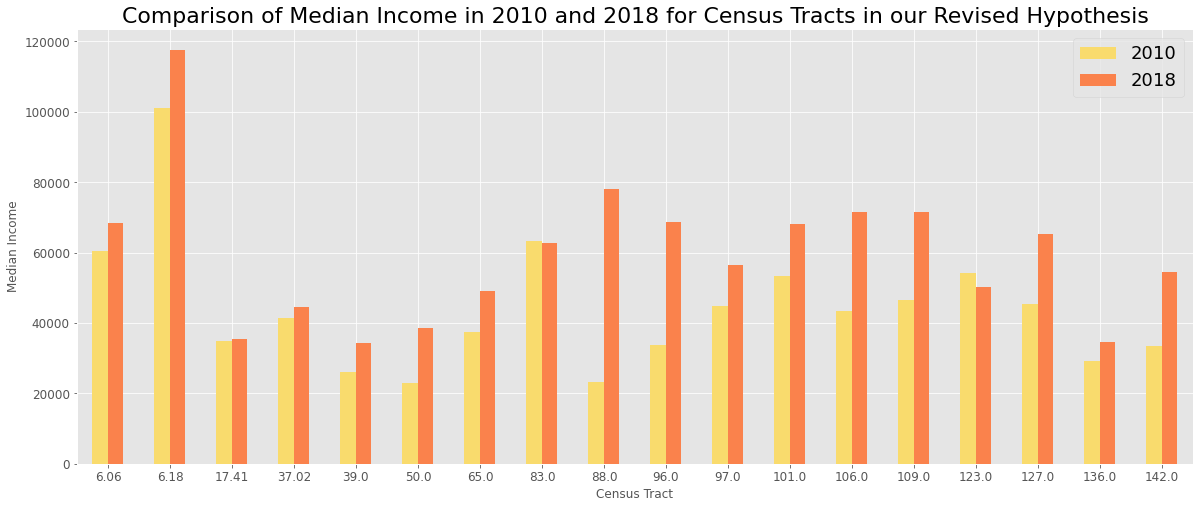

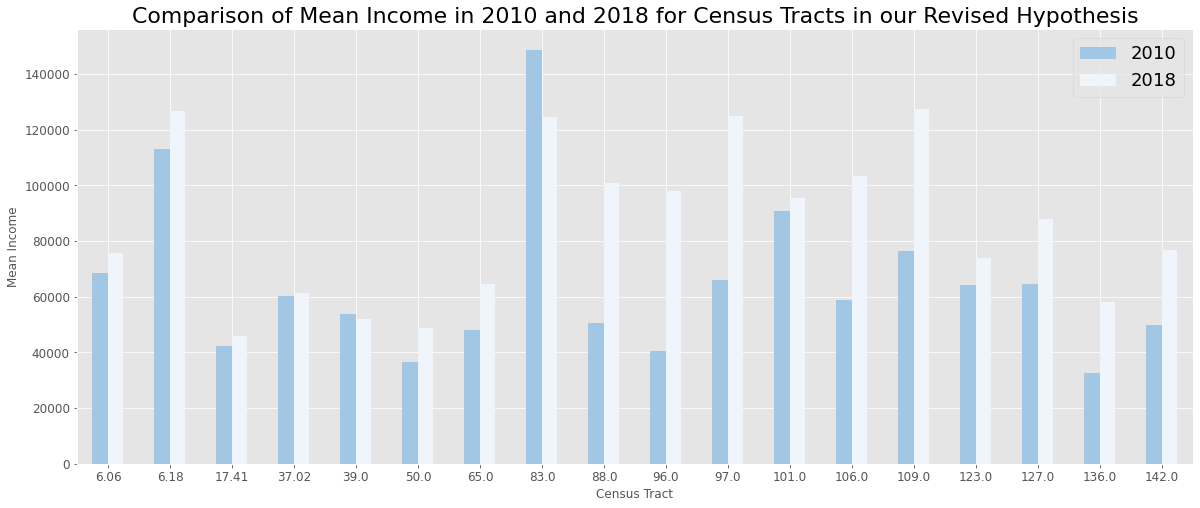

In [9]:
#Want to look at revised hypothesis census tracts and how median/mean income changed 2010-2018
revised_hyp = cens_income[['Census Tract','Household median income (dollars)', 
                           'Household mean income (dollars)', 'Year']]
#Set index to be able to call .loc
revised_hyp = revised_hyp.set_index('Census Tract')

#Only select Census Tracts in our hypothesis
revised_hyp = revised_hyp.loc[rev_hyp]

#Specifying only two years of data: 2010, 2018
inc_change = revised_hyp[(revised_hyp.Year==2010) | (revised_hyp.Year==2018)]

#Change index back
inc_change.reset_index(inplace=True)

#-------------------------------------------Plotting--------------------------------------------

#set theme
temp = ['#f9db6d', '#fa824c', '#a2c7e5', '#eff5fb', '#e4572e', '#f9db6d']

ax1 = inc_change.pivot_table(index='Census Tract', 
                       columns='Year', values='Household median income (dollars)'
                    ).plot.bar(figsize=(20,8), color=temp[:2], rot=0, fontsize='large')

ax2 = inc_change.pivot_table(index='Census Tract', 
                       columns='Year', values='Household mean income (dollars)'
                   ).plot.bar(figsize=(20,8), color=temp[2:4], rot=0, fontsize='large')

#Setting labels and titles
ax1.legend(fontsize=18)
ax1.set_ylabel('Median Income')
ax1.set_title('Comparison of Median Income in 2010 and 2018 for Census Tracts in our Revised Hypothesis', 
                                                                                          fontsize=22)
ax2.legend(fontsize=18)
ax2.set_ylabel('Mean Income')
ax2.set_title('Comparison of Mean Income in 2010 and 2018 for Census Tracts in our Revised Hypothesis', 
                                                                                          fontsize=22)


Both mean and median housheold income increased significantly from 2010-2018 in the Census Tracts defined by our revised hypothesis.

In [10]:
'''
#New column names:
new_cols = ['Percent Black', 'Percent White', 'Percent Asian', 'Percent American Indian', 
        'Percent Hispanic', 'Percent Other']

#Extract all column names ending in "2000"
race_in2000 = race_df.filter(regex='2000$',axis=1)
race_in2000.columns = new_cols
race_in2000['Neighborhood'] = race_df['Neighborhood']
race_in2000['Year'] = '2000'


#Extract all column names ending in "201_"
race_in2018 = race_df.filter(regex='201.$',axis=1)
race_in2018.columns = new_cols
race_in2018['Neighborhood'] = race_df['Neighborhood']
race_in2018['Year'] = '2014-2018'

#combine the two dfs
race_by_year = pd.concat([race_in2000, race_in2018])


#Calculate which neighborhoods had the biggest influx of white people between the two time periods:

#Subtract most recent data from old data
race_by_year['Change in White'] = race_in2018['Percent White'] - race_in2000['Percent White']

#Sort values ascendingly and save indexes of the first 10 values
# **Note: head is set to 20 because there are duplicate values
idxs = list(race_by_year['Change in White'].sort_values(ascending=False).head(30).to_dict().keys())

#Save the 10 neighborhoods with the highest increase in population of white people
highest_change = race_by_year.iloc[idxs]['Neighborhood'].tolist()

order = ['Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian', 
         'Percent American Indian', 'Percent Other']

#Create subsets for each of the years for comparison
subset_2000 = race_in2000[race_df.Neighborhood.isin(highest_change)].sort_values(by='Percent White')
subset_2018 = race_in2018[race_df.Neighborhood.isin(highest_change)].sort_values(by='Percent White')

theme2 = ['#f9db6d', '#eff5fb', '#a2c7e5', '#465c69', '#e4572e', '#fa824c']
#['#e4572e', '#f9db6d', '#fa824c', '#465c69', '#eff5fb', '#a2c7e5']

#Create pivot tables and plot
subset_2000.pivot_table(index='Neighborhood', values=order).plot.bar(stacked=True, fontsize='large',
                                        rot=30, figsize=(20,10), color=theme2, title='Race Distribution in 2000'
                                        ).legend(bbox_to_anchor=(1, 1.2))
subset_2018.pivot_table(index='Neighborhood', values=order).plot.bar(stacked=True, fontsize='large',
                                        rot=30, figsize=(20,10), color=theme2, title='Race Distribution in 2014-2018'
                                        ).legend(bbox_to_anchor=(1, -.1))

'''


'\n#New column names:\nnew_cols = [\'Percent Black\', \'Percent White\', \'Percent Asian\', \'Percent American Indian\', \n        \'Percent Hispanic\', \'Percent Other\']\n\n#Extract all column names ending in "2000"\nrace_in2000 = race_df.filter(regex=\'2000$\',axis=1)\nrace_in2000.columns = new_cols\nrace_in2000[\'Neighborhood\'] = race_df[\'Neighborhood\']\nrace_in2000[\'Year\'] = \'2000\'\n\n\n#Extract all column names ending in "201_"\nrace_in2018 = race_df.filter(regex=\'201.$\',axis=1)\nrace_in2018.columns = new_cols\nrace_in2018[\'Neighborhood\'] = race_df[\'Neighborhood\']\nrace_in2018[\'Year\'] = \'2014-2018\'\n\n#combine the two dfs\nrace_by_year = pd.concat([race_in2000, race_in2018])\n\n\n#Calculate which neighborhoods had the biggest influx of white people between the two time periods:\n\n#Subtract most recent data from old data\nrace_by_year[\'Change in White\'] = race_in2018[\'Percent White\'] - race_in2000[\'Percent White\']\n\n#Sort values ascendingly and save indexe

In [11]:
#Cleaning related datasets to measure gentrification:
'''

inc_dist = inc_dist_df
dists = ['Percent Income Under $10K in 2000',
       'Percent Income Under $10K in 2014-2018',
         'Percent Income $10K-$35K in 2000',
         'Percent Income $10K-$35K in 2014-2018',
         'Percent Income $35K-$60K in 2000',
         'Percent Income $35K-$60K in 2014-2018',
         'Percent Income $60K-$100K in 2000',
         'Percent Income $60K-$100K in 2014-2018',
         'Percent Income $100K-$200K in 2000',
         'Percent Income $100K-$200K in 2014-2018',
         'Percent Income $200K+ in 2000', 'Percent Income $200K+ in 2014-2018']
inc_dist['Percent Income $10K-$35K in 2000'] = (
    inc_dist[ 'Percent Income $10K-$15K in 2000'] +
    inc_dist[ 'Percent Income $15K-$20K in 2000'] + 
    inc_dist['Percent Income $20K-$25K in 2000'] + 
    inc_dist['Percent Income $25K-$30K in 2000']+
    inc_dist['Percent Income $30K-$35K in 2000'])
inc_dist['Percent Income $35K-$60K in 2000'] = (
    inc_dist[ 'Percent Income $35K-$40K in 2000'] +
    inc_dist[ 'Percent Income $40K-$45K in 2000'] + 
    inc_dist['Percent Income $45K-$50K in 2000'] + 
    inc_dist['Percent Income $50K-$60K in 2000'])
inc_dist['Percent Income $60K-$100K in 2000'] = (
    inc_dist[ 'Percent Income $60K-$75K in 2000'] +
    inc_dist[ 'Percent Income $75K-$100K in 2000'])
inc_dist['Percent Income $100K-$200K in 2000']= (
    inc_dist[ 'Percent Income $100K-$125K in 2000'] +
    inc_dist[ 'Percent Income $125K-$150K in 2000'] + 
    inc_dist['Percent Income $150K-$200K in 2000'])

inc_dist['Percent Income $10K-$35K in 2014-2018'] = (
    inc_dist[ 'Percent Income $10K-$15K in 2014-2018'] +
    inc_dist[ 'Percent Income $15K-$20K in 2014-2018'] + 
    inc_dist['Percent Income $20K-$25K in 2014-2018'] + 
    inc_dist['Percent Income $25K-$30K in 2014-2018']+
    inc_dist['Percent Income $30K-$35K in 2014-2018'])
inc_dist['Percent Income $35K-$60K in 2014-2018'] = (
    inc_dist[ 'Percent Income $35K-$40K in 2014-2018'] +
    inc_dist[ 'Percent Income $40K-$45K in 2014-2018'] + 
    inc_dist['Percent Income $45K-$50K in 2014-2018'] + 
    inc_dist['Percent Income $50K-$60K in 2014-2018'])
inc_dist['Percent Income $60K-$100K in 2014-2018'] = (
    inc_dist[ 'Percent Income $60K-$75K in 2014-2018'] +
    inc_dist[ 'Percent Income $75K-$100K in 2014-2018'])
inc_dist['Percent Income $100K-$200K in 2014-2018']= (
    inc_dist[ 'Percent Income $100K-$125K in 2014-2018'] +
    inc_dist[ 'Percent Income $125K-$150K in 2014-2018'] + 
    inc_dist['Percent Income $150K-$200K in 2014-2018'])


household = pd.read_excel(xls, "Table 1", skiprows = 11)
household.drop(columns = ["Unnamed: 4","MOE", "MOE.1", "Unnamed: 8","MOE.2", 
                           2000, "2014-2018"], inplace=True)
household.rename(columns = { 
    "Unnamed: 0" : "Neighborhood",
    "2000.1" : "Total Households in 2000",
    "2014-2018.1" : "Total Households in  2014-2018",
    "2000.2" : "Family Households in 2000",
    "2014-2018.2" : "Family Households in 2014-2018"
    }, inplace = True)
household.dropna(inplace=True)

pov_df = pd.read_excel(xls, "Table 16", skiprows = 11)
pov_df.drop(columns = ["Unnamed: 4","MOE", "MOE.1"], inplace=True)
pov_df.rename(columns = { 
    "Unnamed: 0" : "Neighborhood",
    "2000.1" : "Num at/above Poverty in 2000",
    "2014-2018.1" : "Num at/above Poverty in 2014-2018",
    2000 : "Num in Poverty in 2000",
    "2014-2018" : "Num in Poverty in 2014-2018"
    }, inplace = True)
pov_df.dropna(inplace=True)

school_df = pd.read_excel(xls, "Table 20", skiprows = 11)
school_df.drop(columns = ["Unnamed: 4", "Unnamed: 8", "Unnamed: 12", 
    "Unnamed: 16", "Unnamed: 20", "Unnamed: 24", "MOE", "MOE.1", "MOE.2", "MOE.3",
    "MOE.4", "MOE.5", "MOE.6"], inplace=True)

school_df.rename(columns = { 
    2000 : "<9th Grade in 2000",
    "2014-2018" : "<9th Grade in 2014-2018",
    "Unnamed: 0" : "Neighborhood",
    "2000.1" : "9-12th Grade in 2000",
    "2014-2018.1" : "9-12th Grade in 2014-2018",
    "2000.2" : "HS Diploma/GED in 2000",
    "2014-2018.2" : "HS Diploma/GED in 2014-2018",
    "2000.3" : "Some College in 2000",
    "2014-2018.3" : "Some College in 2014-2018",
    "2000.4" : "Associate's in 2000",
    "2014-2018.4" : "Associate's in 2014-2018",
    "2000.5" : "Bachelor's in 2000",
    "2014-2018.5" : "Bachelor's in 2014-2018",
    "2000.6" : "Graduate's and prof. in 2000",
    "2014-2018.6" : "Graduate's and prof. in 2014-2018",
    }, inplace = True)
school_df.dropna(inplace=True)

#school_df[school_df.Neighborhood.isin(highest_change)].plot.bar(figsize=(20,10))
school_df_hs = school_df[['Neighborhood', '<9th Grade in 2000', 
        '<9th Grade in 2014-2018',
       '9-12th Grade in 2000', '9-12th Grade in 2014-2018',
       'HS Diploma/GED in 2000', 'HS Diploma/GED in 2014-2018']]

school_df_uni = school_df[['Neighborhood', 'Associate\'s in 2000', 
        'Associate\'s in 2014-2018', 'Bachelor\'s in 2000',
       'Bachelor\'s in 2014-2018', 'Graduate\'s and prof. in 2000',
       'Graduate\'s and prof. in 2014-2018']]

transport = pd.read_excel(xls, "Table 17", skiprows = 11)
transport.drop(columns = ["Unnamed: 4","MOE", "MOE.1", "Unnamed: 8","MOE.2", 
                          ], inplace=True)
transport.rename(columns = { 
    "Unnamed: 0" : "Neighborhood",
    2000: "No Vehicle in 2000",
    "2014-2018": "No Vehicle in 2014-2018",
    "2000.1" : "1 Vehicle in 2000",
    "2014-2018.1" : "1 Vehicle in 2014-2018",
    "2000.2" : "2+ Vehicles in 2000",
    "2014-2018.2" : "2+ Vehicles in 2014-2018"
    }, inplace = True)
transport.dropna(inplace=True)
transport[">=1 Vehicle in 2000"] = transport["1 Vehicle in 2000"] + transport["2+ Vehicles in 2000"]
transport[">=1 Vehicle in 2014-2018"] = (transport["1 Vehicle in 2014-2018"] +
                                         transport["2+ Vehicles in 2014-2018"]
)
wage = pd.read_excel(xls, "Table 22", skiprows = 11)
wage.drop(columns = [2004,         2017, 'Unnamed: 3','Unnamed: 6','Unnamed: 9'], inplace=True)
wage.rename(columns = { 
    "Unnamed: 0" : "Neighborhood",
    "2004.1" : "<=$1,250/month in 2004",
    "2017.1" : "<=$1,250/month in 2017",
    "2004.2" : "$1,251 - $3,333/month in 2004",
    "2017.2" : "$1,251 - $3,333/month in 2017",
    "2004.3" : ">$3,333/month in 2004",
    "2017.3" : ">$3,333/month in 2017",
    }, inplace = True)
wage.dropna(inplace=True)

pct_on_housing = pd.read_excel(xls, "Table 12", skiprows = 11)
pct_on_housing.drop(columns = ["Unnamed: 3","MOE", "MOE.1"], inplace=True)
pct_on_housing.rename(columns = { 
    "Unnamed: 0" : "Neighborhood",

    "2014-2018.1" : "Renter occ paying >=30%",

    "2014-2018" : "Owner occ paying >=30%"
    }, inplace = True)
pct_on_housing.dropna(inplace=True)

'''

'\n\ninc_dist = inc_dist_df\ndists = [\'Percent Income Under $10K in 2000\',\n       \'Percent Income Under $10K in 2014-2018\',\n         \'Percent Income $10K-$35K in 2000\',\n         \'Percent Income $10K-$35K in 2014-2018\',\n         \'Percent Income $35K-$60K in 2000\',\n         \'Percent Income $35K-$60K in 2014-2018\',\n         \'Percent Income $60K-$100K in 2000\',\n         \'Percent Income $60K-$100K in 2014-2018\',\n         \'Percent Income $100K-$200K in 2000\',\n         \'Percent Income $100K-$200K in 2014-2018\',\n         \'Percent Income $200K+ in 2000\', \'Percent Income $200K+ in 2014-2018\']\ninc_dist[\'Percent Income $10K-$35K in 2000\'] = (\n    inc_dist[ \'Percent Income $10K-$15K in 2000\'] +\n    inc_dist[ \'Percent Income $15K-$20K in 2000\'] + \n    inc_dist[\'Percent Income $20K-$25K in 2000\'] + \n    inc_dist[\'Percent Income $25K-$30K in 2000\']+\n    inc_dist[\'Percent Income $30K-$35K in 2000\'])\ninc_dist[\'Percent Income $35K-$60K in 2000\'] = (\

In [12]:
'''#Plotting these features:

inc_dist[inc_dist_df.Neighborhood.isin(highest_change[:5])][dists].plot.bar(figsize=(20,10))

avg_income_df[avg_income_df.Neighborhood.isin(highest_change)].plot.bar(figsize=(20,10))

household[household.Neighborhood.isin(highest_change)][['Neighborhood','Family Households in 2000',
                                    'Family Households in 2014-2018']].plot.bar(figsize=(20,10))

rent_own_df[rent_own_df.Neighborhood.isin(highest_change)][['Neighborhood',
       'Percent Owner Occupied in 2000', 'Percent Owner Occupied in 2014-2018',
       'Percent Renter Occupied in 2000',
       'Percent Renter Occupied in 2014-2018']].plot.bar(figsize=(20,10))

pov_df[pov_df.Neighborhood.isin(highest_change)][['Neighborhood',
                    "Num in Poverty in 2000", "Num in Poverty in 2014-2018"
                                ]].plot.bar(figsize=(20,10))
school_df_hs[school_df_hs.Neighborhood.isin(highest_change[:5])].plot.bar(figsize=(20,10))
school_df_uni[school_df_uni.Neighborhood.isin(highest_change[:5])].plot.bar(figsize=(20,10))

transport[transport.Neighborhood.isin(highest_change)][['Neighborhood',">=1 Vehicle in 2000",
">=1 Vehicle in 2014-2018", "No Vehicle in 2000", "No Vehicle in 2014-2018"]].plot.bar(figsize=(20,10))

wage[wage.Neighborhood.isin(highest_change)][['Neighborhood', '>$3,333/month in 2004', 
                                    '>$3,333/month in 2017']].plot.bar(figsize=(20,10))

pct_on_housing[pov_df.Neighborhood.isin(highest_change)].plot.bar(figsize=(20,10))

'''

'#Plotting these features:\n\ninc_dist[inc_dist_df.Neighborhood.isin(highest_change[:5])][dists].plot.bar(figsize=(20,10))\n\navg_income_df[avg_income_df.Neighborhood.isin(highest_change)].plot.bar(figsize=(20,10))\n\nhousehold[household.Neighborhood.isin(highest_change)][[\'Neighborhood\',\'Family Households in 2000\',\n                                    \'Family Households in 2014-2018\']].plot.bar(figsize=(20,10))\n\nrent_own_df[rent_own_df.Neighborhood.isin(highest_change)][[\'Neighborhood\',\n       \'Percent Owner Occupied in 2000\', \'Percent Owner Occupied in 2014-2018\',\n       \'Percent Renter Occupied in 2000\',\n       \'Percent Renter Occupied in 2014-2018\']].plot.bar(figsize=(20,10))\n\npov_df[pov_df.Neighborhood.isin(highest_change)][[\'Neighborhood\',\n                    "Num in Poverty in 2000", "Num in Poverty in 2014-2018"\n                                ]].plot.bar(figsize=(20,10))\nschool_df_hs[school_df_hs.Neighborhood.isin(highest_change[:5])].plot.bar(figsi

# Looking into Another Dataset
**Source:** The Data Center analysis of data from U.S. Census 2000 Summary File 1 (SF1) and 2014-2018 American Community Survey. These data tables support Neighborhood Statistical Area Data Profiles. This includes 252 data points for all 72 neighborhood statistical areas, with New Orleans and United States comparisons. Data originates from Census 2000 and 2010, American Community Survey 2014–2018, and 2017 Local Employment Dynamics data — including housing and housing costs, income and poverty, transportation, educational attainment, language, employment, and more.

## Loading in and Cleaning the Data
My analysis utilizes a combination of three different datasets:<br><br>
`race_df`: The distribution of racial makeup for each neighborhood spanning 2000 and 2014-2018<br>
`avg_income_df`: Average household income for each neighborhood spanning 2000 and 2014-2018<br>
`avg_rent_df`: Average contract and gross rent (gross rent includes utilities) for each neighborhood in 2014-2018 only<br><br>
By combining these datasets, we can visualize the way that racial makeup plays into average household income and average rent prices.

In [13]:
#Loading in another dataset
xls = pd.ExcelFile("./Data/Neighborhood profiles data tables.xlsx")

#import and clean racial distribution dataset
race_df = pd.read_excel(xls, "Table 4", skiprows = 11)
race_df.drop(columns = ["Unnamed: 4", "Unnamed: 8", "Unnamed: 12", "Unnamed: 16", "Unnamed: 20", 
                        "Unnamed: 24", "MOE", "MOE.1", "MOE.2", "MOE.3", "MOE.4", "MOE.5", "MOE.6", 
                        "2000.4", "2014-2018.4"], inplace=True)
race_df.rename(columns = { 
    "Unnamed: 0" : "Neighborhood",
    2000 : "Percent Black in 2000", 
    "2014-2018" : "Percent Black in 2014-2018",
    "2000.1" : "Percent White in 2000", 
    "2014-2018.1" : "Percent White in 2014-2018",
    "2000.2" : "Percent Asian in 2000", 
    "2014-2018.2" : "Percent Asian in 2014-2018",
    "2000.3" : "Percent American Indian in 2000", 
    "2014-2018.3" : "Percent American Indian in 2014-2018",
    "2000.5" : "Percent Hispanic in 2000", 
    "2013-2017" : "Percent Hispanic in 2013-2017",
    "2000.6" : "Percent Other in 2000", 
    "2013-2017.1" : "Percent Other in 2013-2017"
    }, inplace = True)

race_df = race_df.replace('NaN%', 0)
race_df.dropna(inplace=True)
race_df["Percent Black in 2014-2018"] = race_df["Percent Black in 2014-2018"].astype(float)
race_df["Percent White in 2014-2018"] = race_df["Percent White in 2014-2018"].astype(float)
race_df["Percent Asian in 2014-2018"] = race_df["Percent Asian in 2014-2018"].astype(float)
race_df["Percent American Indian in 2014-2018"] = \
                        race_df["Percent American Indian in 2014-2018"].astype(float)
race_df["Percent Hispanic in 2013-2017"] = race_df["Percent Hispanic in 2013-2017"].astype(float)
race_df["Percent Other in 2013-2017"] = race_df["Percent Other in 2013-2017"].astype(float)

#Import and clean average household income data
avg_income_df = pd.read_excel(xls, "Table 14", skiprows = 11)
avg_income_df.drop(columns='MOE', inplace=True)
avg_income_df.rename(columns = {'Unnamed: 0':'Neighborhood', 2000 : "Avg Household Income in 2000", 
    "2014-2018" : "Avg Household Income in 2014-2018"}, inplace=True)

#Cleaning average rent data
avg_rent_df = pd.read_excel(xls, "Table 11", skiprows = 11)
avg_rent_df.drop(columns = ["Unnamed: 3","MOE", "MOE.1"], inplace=True)
avg_rent_df.rename(columns = { 
    "Unnamed: 0" : "Neighborhood",
    "2014-2018" : "Avg Contract Rent in 2014-2018",
    "2014-2018.1" : "Avg Gross Rent in 2014-2018"
    }, inplace = True)

### Comparing Racial Distributions in 2000 vs 2014-2018
For this visualization, I decided to compare the racial makeup of 10 neighborhoods in New Orleans using the data from 2000 and from 2014-2018. I chose the 10 neighborhoods by calculating those in which neighborhoods which experienced the largest increase in percentage of white residents between the two time periods. <br>
To do so, I created two separate dataframes for the different time periods and concatenated them into a dataframe called race_by_year, and calculated the change in percentage of white inhabitants between the two datapoints, sorting them descendingly and saving the indices. 

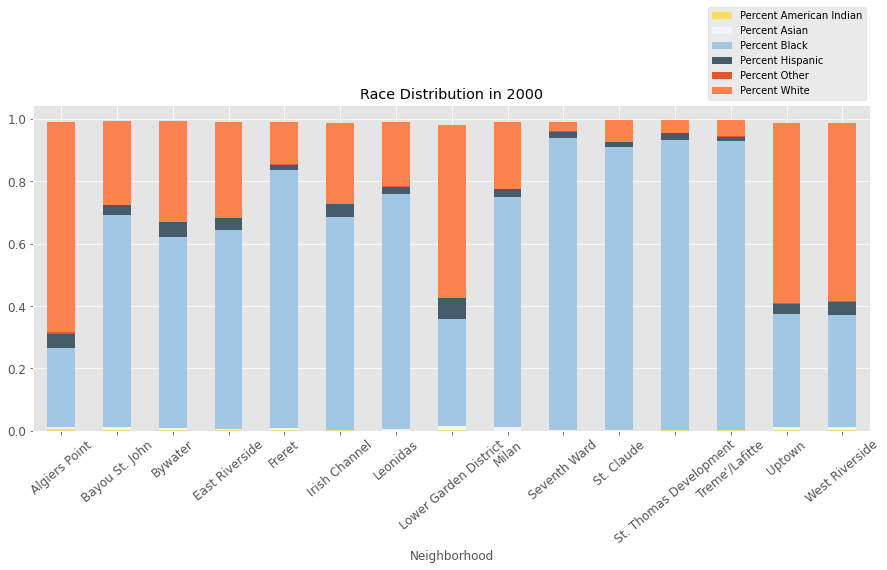

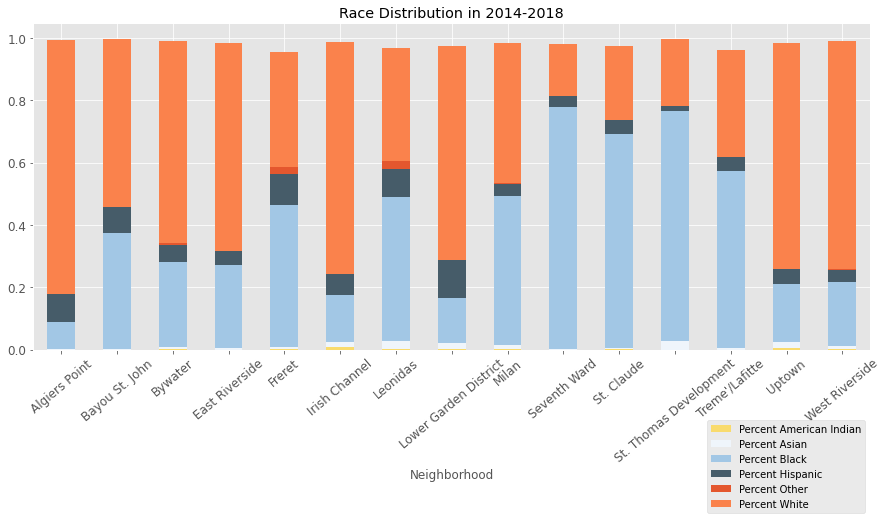

In [14]:
#Create new column names for ease:
new_cols = ['Percent Black', 'Percent White', 'Percent Asian', 'Percent American Indian', 
        'Percent Hispanic', 'Percent Other']

#Extract all column names ending in "2000"
race_in2000 = race_df.filter(regex='2000$',axis=1)
race_in2000.columns = new_cols
race_in2000['Neighborhood'] = race_df['Neighborhood']
race_in2000['Year'] = '2000'


#Extract all column names ending in "201_"
race_in2018 = race_df.filter(regex='201.$',axis=1)
race_in2018.columns = new_cols
race_in2018['Neighborhood'] = race_df['Neighborhood']
race_in2018['Year'] = '2014-2018'

#combine the two dfs
race_by_year = pd.concat([race_in2000, race_in2018])


#Calculate which neighborhoods had the biggest influx of white people between the two time periods:

#Subtract most recent data from old data
race_by_year['Change in White'] = race_in2018['Percent White'] - race_in2000['Percent White']

#Sort values ascendingly and save indexes of the first 15 values
# **Note: head is set to 30 because there are duplicate values and we want 15
idxs = list(race_by_year['Change in White'].sort_values(ascending=False).head(30).to_dict().keys())

#Save the 10 neighborhoods with the highest increase in population of white people
highest_change = race_by_year.iloc[idxs]['Neighborhood'].tolist()

order = ['Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian', 
         'Percent American Indian', 'Percent Other']

#Create subsets for each of the years for comparison
subset_2000 = race_in2000[race_df.Neighborhood.isin(highest_change)].sort_values(by='Percent White')
subset_2018 = race_in2018[race_df.Neighborhood.isin(highest_change)].sort_values(by='Percent White')

#-------------------------------------------Plotting--------------------------------------------

#color theme for graphs -- using a different theme to distinguish between datasets
theme2 = ['#f9db6d', '#eff5fb', '#a2c7e5', '#465c69', '#e4572e', '#fa824c']

#Create pivot tables and plot
subset_2000.pivot_table(index='Neighborhood', values=order).plot.bar(stacked=True, fontsize='large',
                            rot=40, figsize=(15,6), color=theme2, title='Race Distribution in 2000'
                                        ).legend(bbox_to_anchor=(.8, 1))
subset_2018.pivot_table(index='Neighborhood', values=order).plot.bar(stacked=True, fontsize='large',
                        rot=40, figsize=(15,6), color=theme2, title='Race Distribution in 2014-2018'
                                        ).legend(bbox_to_anchor=(1, -.2))


This visualization simply demonstrates how drastically the shift in demographic was moving from 2000 to 2018 in this sample set of New Orleans neighborhoods. These large demographic changes in only a span of a few years are likely due to gentrification in New Orleans. We can utilize these results along with other neighborhood information to determine the areas experiencing the most impact.

### Comparing Correlation Between Average Household Income and Race in 2000 and 2014-2018
For this visualization, I decided to compare the correlation between the racial makeup of each neighborhood in the dataset and its average household income. <br>
To do so, I merged the dataset of racial makeup with that of average income and found the correlation. I then filtered out all of the columns for each respective year and created two datasets: `race_income_2000` and `race_income_2018` which each contain the relationship between the two variables for that year only. Finally, I plotted it so that the positive and negative correlations are clear.

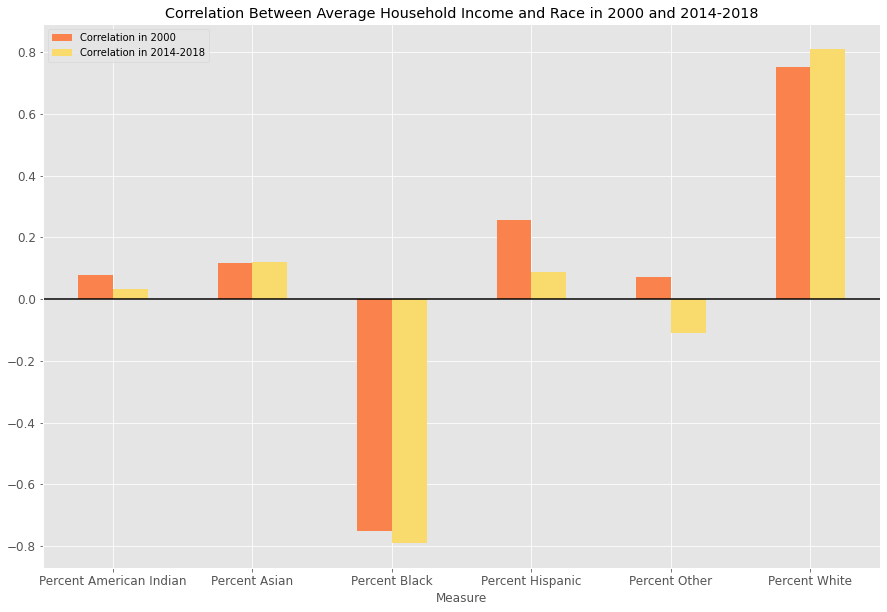

In [15]:
#Create dataframe comparing race and income
race_income = avg_income_df.merge(race_df, how='outer', on='Neighborhood')

#filter out datasets into 2000 and 2014-2018
race_income_2000 = race_df.filter(regex='2000$',axis=1)
race_income_2000.columns = new_cols
race_income_2000['Neighborhood'] = race_df['Neighborhood']
race_income_2000['Year'] = '2000'
race_income_2000['Avg Household Income'] = race_income['Avg Household Income in 2000']

race_income_2018 = race_df.filter(regex='201.$',axis=1)
race_income_2018.columns = new_cols
race_income_2018['Neighborhood'] = race_df['Neighborhood']
race_income_2018['Year'] = '2014-2018'
race_income_2018['Avg Household Income'] = race_income['Avg Household Income in 2014-2018'].replace(
                                                                                '$NaN', np.nan).dropna()

#correlation dataset for 2000 and 2014-2018
corr_2000 = pd.DataFrame(race_income_2000.corr()['Avg Household Income']).reset_index()
corr_2018 = pd.DataFrame(race_income_2018.corr()['Avg Household Income']).reset_index()

#Merge the two datasets, adding a suffix for the year
corr_by_year = corr_2000.merge(corr_2018, how='outer', on='index', suffixes=('_2000', '_2014-2018'))

#Make column names more readable and drop Avg Household Inc's comparison with itself which is always 1
corr_by_year.columns = ['Measure', 'Correlation in 2000', 'Correlation in 2014-2018']
corr_by_year.drop(6, inplace=True)

#Plot the pivot table with the appropriate Labels
corr_by_year.pivot_table(index='Measure', 
                    values = ['Correlation in 2000', 'Correlation in 2014-2018']).plot.bar(
                    title='Correlation Between Average Household Income and Race in 2000 and 2014-2018', 
                    figsize=(15,10), fontsize='large', rot=0, color=['#fa824c', '#f9db6d']).axhline(y=0, 
                                                                                        color='black')

From this graph it is very clear to see that the percentage of black residents has a very strong negative correlation with average household income. The opposite is true for white residents. I found it interesting that the general trend when moving from 2000 to 2014-2018, the prevalence of races other than white had a more negative correlation with average household income.

### Visualizing the Correlation Between Average Contract Rent and Race in 2014-2018
Similar to the previous graph, I wanted to illustrate how race is correlated with rent prices. <br>
To do so, I followed a similar process by merging the dataset of racial makeup with that of average contract rent (excluding utilities) and found the correlation. Since the dataset only has rent prices for 2014-2018, I focused on a simple correlation graph rather than a comparison. Finally, I plotted it such that the positive and negative correlations are clear.

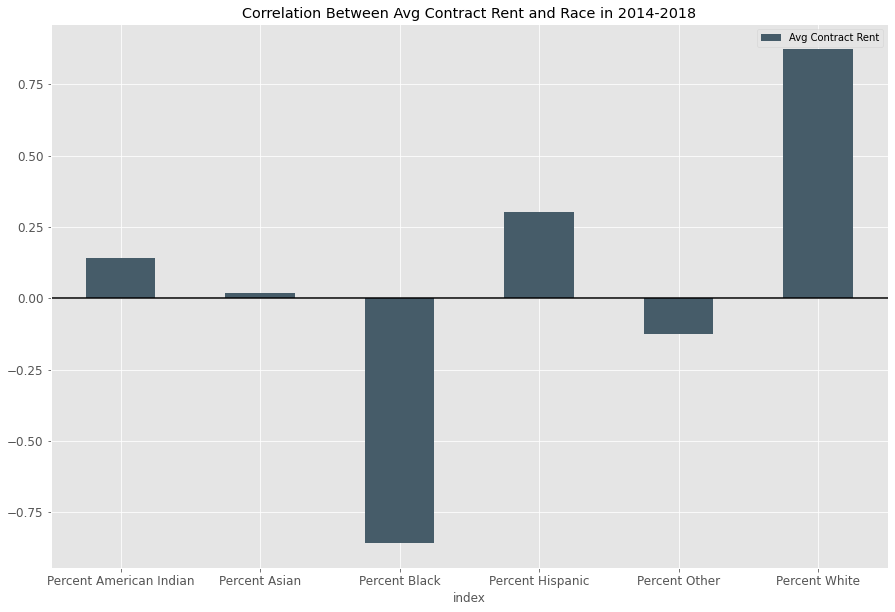

In [16]:
#Create dataframe comparing race and rent
race_rent = avg_rent_df.merge(race_df, how='outer', on='Neighborhood')

race_rent_2018 = race_df.filter(regex='201.$',axis=1)
race_rent_2018.columns = new_cols
race_rent_2018['Neighborhood'] = race_df['Neighborhood']
race_rent_2018['Year'] = '2014-2018'
race_rent_2018['Avg Contract Rent'] = race_rent['Avg Contract Rent in 2014-2018'].replace(
                                                                    'na', np.nan).dropna().astype(float)

#correlation dataset for 2000 and 2014-2018
corr_2018 = pd.DataFrame(race_rent_2018.corr()['Avg Contract Rent']).reset_index()


#Make column names more readable and drop Avg Household Inc's comparison with itself which is always 1
corr_2018.drop(6, inplace=True)

#Plot the pivot table with the appropriate Labels
corr_2018.pivot_table(index='index', 
                    values = ['Avg Contract Rent']).plot.bar(
                    title='Correlation Between Avg Contract Rent and Race in 2014-2018', 
                    figsize=(15,10), fontsize='large', rot=0, color='#465c69').axhline(y=0, 
                                                                                        color='black')

From this graph it is very clear to see that the percentage of black residents has a very strong negative correlation with average rent price. The opposite is true for white residents. This is consistent with the effects of gentrification: the larger the influx of white residents into a given area, the more expensive the rent becomes.

### Comparing Average Income in 2000 vs 2014-2018
For this visualization, I simply made a boxplot showing Average Household Income in 2000 vs Average Household Income in 2014-2018 to more easily represent summary statistics for this variable.

Text(0.5, 1.0, 'Analysis of Average Household Income in 2014-2018')

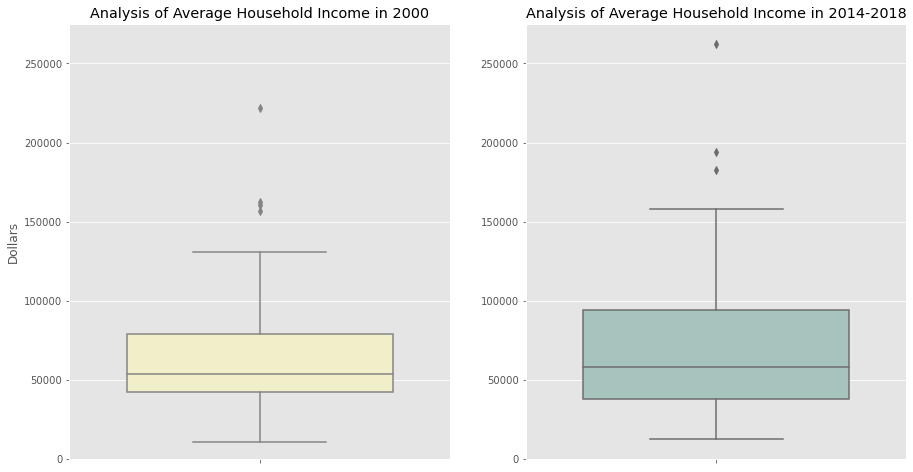

In [17]:
#Create two boxplots showing summary statistics

#Year 2000
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
p1 = sns.boxplot(data = race_income_2000, color='#f6f5c2', y = 'Avg Household Income', width=.7)
p1.set_ylim(0, 275000)
p1.set_ylabel("Dollars")
p1.set_title("Analysis of Average Household Income in 2000")

#Years 2014-2018
plt.subplot(1, 2, 2)
p2 = sns.boxplot(data = race_income_2018, color='#a1c8c1', y = 'Avg Household Income', width=.7)
p2.set_ylim(0, 275000)
p2.set_ylabel("")
p2.set_title("Analysis of Average Household Income in 2014-2018")

These two plots show that the median increased from 2000 to 2014-2018, and both the min and max expereinced an upward shift. The height of the box increased as well. Specifications on the statistics plotted here are made below.

# Summary Statistics and Measures of Central Tendency
In order to summarize the dataset I've been working with, I created a table of summary statistics incorporating the describe() function along with the median, the variance, the interquartile range (IQR), and the mean absolute deviation (MAD) for each year.

In [18]:
#Add row of median, variance, IQR, and Mean Absolute Deviation to 2000 data and 2014-2018 data 

#save summary stats
stats_2000 = race_income_2000.describe()
stats_2018 = race_income_2018.describe()

#create dataframes
more2000 = pd.DataFrame(columns=['index'] + stats_2000.columns.tolist())
more2018 = pd.DataFrame(columns=['index'] + stats_2018.columns.tolist())

#start lists with decription of stats
IQR2000, IQR2018 = ['IQR'], ['IQR']
var2000, var2018 = ['var'], ['var']
med2000, med2018 = ['median'], ['median']
mad2000, mad2018 = ['MAD'], ['MAD']


#add stats to each respective list
for c in stats_2018.columns:
    IQR2000.append(race_income_2000[c].quantile(.75) - race_income_2000[c].quantile(.25))
    IQR2018.append(race_income_2018[c].quantile(.75) - race_income_2018[c].quantile(.25))
    var2000.append(race_income_2000[c].var())
    var2018.append(race_income_2018[c].var())
    med2000.append(race_income_2000[c].median())
    med2018.append(race_income_2018[c].median())
    mad2000.append(race_income_2000[c].mad())
    mad2018.append(race_income_2018[c].mad())
    
    
#add lists to dfs
more2000.loc[0], more2018.loc[0] = med2000, med2018
more2000.loc[1], more2018.loc[1] = var2000, var2018
more2000.loc[2], more2018.loc[2] = IQR2000, IQR2018
more2000.loc[3], more2018.loc[3] = mad2000, mad2018

#add dfs back in
stats_2000 = pd.concat([stats_2000.reset_index(), more2000]).set_index('index')
stats_2018 = pd.concat([stats_2018.reset_index(), more2018]).set_index('index')

#display data for 2000
stats_2000

,Percent Black,Percent White,Percent Asian,Percent American Indian,Percent Hispanic,Percent Other,Avg Household Income
index,,,,,,,
count,74.0000,74.0000,74.0000,74.0000,74.0000,74.0000,74.0000
mean,0.6119,0.3243,0.0189,0.0019,0.0311,0.0021,62873.6216
std,0.3293,0.3123,0.0460,0.0015,0.0211,0.0019,35687.4230
min,0.0060,0.0020,0.0000,0.0000,0.0010,0.0000,10472.0000
25%,0.3323,0.0540,0.0023,0.0010,0.0150,0.0010,42327.0000
50%,0.6880,0.2240,0.0070,0.0020,0.0265,0.0020,53822.0000
75%,0.9005,0.5757,0.0160,0.0030,0.0420,0.0030,78663.7500
max,0.9910,0.9430,0.3710,0.0070,0.1250,0.0080,221533.0000
median,0.6880,0.2240,0.0070,0.0020,0.0265,0.0020,53822.0000


In [19]:
#display data for 2014-2018
stats_2018

,Percent Black,Percent White,Percent Asian,Percent American Indian,Percent Hispanic,Percent Other,Avg Household Income
index,,,,,,,
count,74.0000,74.0000,74.0000,74.0000,74.0000,74.0000,73.0000
mean,0.5406,0.3505,0.0228,0.0013,0.0519,0.0047,71214.6027
std,0.3357,0.3104,0.0467,0.0026,0.0371,0.0074,44819.4959
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,12324.0000
25%,0.1927,0.0762,0.0030,0.0000,0.0238,0.0000,37697.0000
50%,0.5965,0.2235,0.0115,0.0000,0.0470,0.0020,57960.0000
75%,0.8207,0.6442,0.0238,0.0018,0.0755,0.0058,93979.0000
max,0.9830,0.9590,0.3640,0.0150,0.1780,0.0400,262051.0000
median,0.5965,0.2235,0.0115,0.0000,0.0470,0.0020,57960.0000


From comparing the two tables, the data is pretty similar for the most part, however the average racial distribution of white residents has increased, ultimately shrinking that of black residents.

In [20]:
#Loading and cleaning datasets related to measuring gentrification: 

#Cleaning Occupancy Data by RENTER/OWNER
rent_own_df = pd.read_excel(xls, "Table 9", skiprows = 11)
rent_own_df.drop(columns = ["Unnamed: 4", "Unnamed: 8", "MOE", "MOE.1", "MOE.2"], inplace=True)
rent_own_df.rename(columns = { 
    "Unnamed: 0" : "Neighborhood",
    2000 : "Total Occupied Housing Units in 2000", 
    "2014-2018" : "Total Occupied Housing Units in 2014-2018",
    "2000.1" : "Percent Owner Occupied in 2000", 
    "2014-2018.1" : "Percent Owner Occupied in 2014-2018",
    "2000.2" : "Percent Renter Occupied in 2000", 
    "2014-2018.2" : "Percent Renter Occupied in 2014-2018"
    }, inplace = True)

#Cleaning average rent data
avg_rent_df = pd.read_excel(xls, "Table 11", skiprows = 11)
avg_rent_df.drop(columns = ["Unnamed: 3","MOE", "MOE.1"], inplace=True)
avg_rent_df.rename(columns = { 
    "Unnamed: 0" : "Neighborhood",
    "2014-2018" : "Avg Contract Rent in 2014-2018",
    "2014-2018.1" : "Avg Gross Rent in 2014-2018"
    }, inplace = True)

#Cleaning average household income data
avg_income_df = pd.read_excel(xls, "Table 14", skiprows = 11)
avg_income_df.drop(columns='MOE', inplace=True)
avg_income_df.rename(columns = {'Unnamed: 0':'Neighborhood', 2000 : "Avg Household Income in 2000", 
    "2014-2018" : "Avg Household Income in 2014-2018"}, inplace=True)

#Cleaning income distribution data
inc_dist_df = pd.read_excel(xls, "Table 15", skiprows = 11)
inc_dist_df.drop(columns = ["Unnamed: 4", "Unnamed: 8", "Unnamed: 12", 
                            "Unnamed: 16", "Unnamed: 20", "Unnamed: 24","Unnamed: 28", "Unnamed: 32", 
                            "Unnamed: 36", "Unnamed: 40", "Unnamed: 44", "Unnamed: 48", "Unnamed: 52",
                            "Unnamed: 56", "Unnamed: 60", 
                            "MOE", "MOE.1", "MOE.2", "MOE.3", "MOE.4", "MOE.5", 
                            "MOE.6", "MOE.7", "MOE.8", "MOE.9", "MOE.10",
                            "MOE.11", "MOE.12", "MOE.13", "MOE.14", "MOE.15"], inplace=True)

inc_dist_df.rename(columns = { 
    "Unnamed: 0" : "Neighborhood",
    2000 : "Percent Income Under $10K in 2000", 
    "2000.1" : "Percent Income $10K-$15K in 2000",
    "2000.2" : "Percent Income $15K-$20K in 2000",
    "2000.3" : "Percent Income $20K-$25K in 2000",
    "2000.4" : "Percent Income $25K-$30K in 2000",
    "2000.5" : "Percent Income $30K-$35K in 2000",
    "2000.6" : "Percent Income $35K-$40K in 2000",
    "2000.7" : "Percent Income $40K-$45K in 2000",
    "2000.8" : "Percent Income $45K-$50K in 2000",
    "2000.9" : "Percent Income $50K-$60K in 2000",
    "2000.10" : "Percent Income $60K-$75K in 2000",
    "2000.11" : "Percent Income $75K-$100K in 2000",
    "2000.12" : "Percent Income $100K-$125K in 2000",
    "2000.13" : "Percent Income $125K-$150K in 2000",
    "2000.14" : "Percent Income $150K-$200K in 2000",
    "2000.15" : "Percent Income $200K+ in 2000",
    "2014-2018" : "Percent Income Under $10K in 2014-2018", 
    "2014-2018.1" : "Percent Income $10K-$15K in 2014-2018",
    "2014-2018.2" : "Percent Income $15K-$20K in 2014-2018",
    "2014-2018.3" : "Percent Income $20K-$25K in 2014-2018",
    "2014-2018.4" : "Percent Income $25K-$30K in 2014-2018",
    "2014-2018.5" : "Percent Income $30K-$35K in 2014-2018",
    "2014-2018.6" : "Percent Income $35K-$40K in 2014-2018",
    "2014-2018.7" : "Percent Income $40K-$45K in 2014-2018",
    "2014-2018.8" : "Percent Income $45K-$50K in 2014-2018",
    "2014-2018.9" : "Percent Income $50K-$60K in 2014-2018",
    "2014-2018.10" : "Percent Income $60K-$75K in 2014-2018",
    "2014-2018.11" : "Percent Income $75K-$100K in 2014-2018",
    "2014-2018.12" : "Percent Income $100K-$125K in 2014-2018",
    "2014-2018.13" : "Percent Income $125K-$150K in 2014-2018",
    "2014-2018.14" : "Percent Income $150K-$200K in 2014-2018",
    "2014-2018.15" : "Percent Income $200K+ in 2014-2018",
    }, inplace = True)

#Redefine bounds

inc_dist = inc_dist_df
dists = ['Percent Income Under $10K in 2000',
       'Percent Income Under $10K in 2014-2018',
         'Percent Income $10K-$35K in 2000',
         'Percent Income $10K-$35K in 2014-2018',
         'Percent Income $35K-$60K in 2000',
         'Percent Income $35K-$60K in 2014-2018',
         'Percent Income $60K-$100K in 2000',
         'Percent Income $60K-$100K in 2014-2018',
         'Percent Income $100K-$200K in 2000',
         'Percent Income $100K-$200K in 2014-2018',
         'Percent Income $200K+ in 2000', 'Percent Income $200K+ in 2014-2018']
inc_dist_col = ['Neighborhood'] + dists
inc_dist['Percent Income $10K-$35K in 2000'] = (
    inc_dist[ 'Percent Income $10K-$15K in 2000'] +
    inc_dist[ 'Percent Income $15K-$20K in 2000'] + 
    inc_dist['Percent Income $20K-$25K in 2000'] + 
    inc_dist['Percent Income $25K-$30K in 2000']+
    inc_dist['Percent Income $30K-$35K in 2000'])
inc_dist['Percent Income $35K-$60K in 2000'] = (
    inc_dist[ 'Percent Income $35K-$40K in 2000'] +
    inc_dist[ 'Percent Income $40K-$45K in 2000'] + 
    inc_dist['Percent Income $45K-$50K in 2000'] + 
    inc_dist['Percent Income $50K-$60K in 2000'])
inc_dist['Percent Income $60K-$100K in 2000'] = (
    inc_dist[ 'Percent Income $60K-$75K in 2000'] +
    inc_dist[ 'Percent Income $75K-$100K in 2000'])
inc_dist['Percent Income $100K-$200K in 2000']= (
    inc_dist[ 'Percent Income $100K-$125K in 2000'] +
    inc_dist[ 'Percent Income $125K-$150K in 2000'] + 
    inc_dist['Percent Income $150K-$200K in 2000'])

inc_dist['Percent Income $10K-$35K in 2014-2018'] = (
    inc_dist[ 'Percent Income $10K-$15K in 2014-2018'] +
    inc_dist[ 'Percent Income $15K-$20K in 2014-2018'] + 
    inc_dist['Percent Income $20K-$25K in 2014-2018'] + 
    inc_dist['Percent Income $25K-$30K in 2014-2018']+
    inc_dist['Percent Income $30K-$35K in 2014-2018'])
inc_dist['Percent Income $35K-$60K in 2014-2018'] = (
    inc_dist[ 'Percent Income $35K-$40K in 2014-2018'] +
    inc_dist[ 'Percent Income $40K-$45K in 2014-2018'] + 
    inc_dist['Percent Income $45K-$50K in 2014-2018'] + 
    inc_dist['Percent Income $50K-$60K in 2014-2018'])
inc_dist['Percent Income $60K-$100K in 2014-2018'] = (
    inc_dist[ 'Percent Income $60K-$75K in 2014-2018'] +
    inc_dist[ 'Percent Income $75K-$100K in 2014-2018'])
inc_dist['Percent Income $100K-$200K in 2014-2018']= (
    inc_dist[ 'Percent Income $100K-$125K in 2014-2018'] +
    inc_dist[ 'Percent Income $125K-$150K in 2014-2018'] + 
    inc_dist['Percent Income $150K-$200K in 2014-2018'])


# Cleaning percent of income spent on housing data for owner-occupied vs renter-occupied
pct_on_housing = pd.read_excel(xls, "Table 12", skiprows = 11)
pct_on_housing.drop(columns = ["Unnamed: 3","MOE", "MOE.1"], inplace=True)
pct_on_housing.rename(columns = { 
    "Unnamed: 0" : "Neighborhood",
    "2014-2018.1" : "Renter Occ paying >=30%",
    "2014-2018" : "Owner Occ paying >=30%"
    }, inplace = True)
pct_on_housing.dropna(inplace=True)

#Loading and cleaning household data: shows family households and non-family households
household = pd.read_excel(xls, "Table 1", skiprows = 11)
household.drop(columns = ["Unnamed: 4","MOE", "MOE.1", "Unnamed: 8","MOE.2", 
                           2000, "2014-2018"], inplace=True)
household.rename(columns = { 
    "Unnamed: 0" : "Neighborhood",
    "2000.1" : "Total Households in 2000",
    "2014-2018.1" : "Total Households in  2014-2018",
    "2000.2" : "Family Households in 2000",
    "2014-2018.2" : "Family Households in 2014-2018"
    }, inplace = True)
household.dropna(inplace=True)

#Loading and cleaning poverty database: shows poverty rate in each neighborhood in 2 different periods
pov_df = pd.read_excel(xls, "Table 16", skiprows = 11)
pov_df.drop(columns = ["Unnamed: 4","MOE", "MOE.1"], inplace=True)
pov_df.rename(columns = { 
    "Unnamed: 0" : "Neighborhood",
    "2000.1" : "Num at/above Poverty in 2000",
    "2014-2018.1" : "Num at/above Poverty in 2014-2018",
    2000 : "Num in Poverty in 2000",
    "2014-2018" : "Num in Poverty in 2014-2018"
    }, inplace = True)
pov_df.dropna(inplace=True)

#Schooling data: divided into two graphs: finishing somewhere in high school vs college/above
school_df = pd.read_excel(xls, "Table 20", skiprows = 11)
school_df.drop(columns = ["Unnamed: 4", "Unnamed: 8", "Unnamed: 12", 
    "Unnamed: 16", "Unnamed: 20", "Unnamed: 24", "MOE", "MOE.1", "MOE.2", "MOE.3",
    "MOE.4", "MOE.5", "MOE.6"], inplace=True)

school_df.rename(columns = { 
    2000 : "<9th Grade in 2000",
    "2014-2018" : "<9th Grade in 2014-2018",
    "Unnamed: 0" : "Neighborhood",
    "2000.1" : "9-12th Grade in 2000",
    "2014-2018.1" : "9-12th Grade in 2014-2018",
    "2000.2" : "HS Diploma/GED in 2000",
    "2014-2018.2" : "HS Diploma/GED in 2014-2018",
    "2000.3" : "Some College in 2000",
    "2014-2018.3" : "Some College in 2014-2018",
    "2000.4" : "Associate's in 2000",
    "2014-2018.4" : "Associate's in 2014-2018",
    "2000.5" : "Bachelor's in 2000",
    "2014-2018.5" : "Bachelor's in 2014-2018",
    "2000.6" : "Graduate's and prof. in 2000",
    "2014-2018.6" : "Graduate's and prof. in 2014-2018",
    }, inplace = True)
school_df.dropna(inplace=True)

#highschool dataset
school_df_hs = school_df[['Neighborhood', '<9th Grade in 2000', 
        '<9th Grade in 2014-2018',
       '9-12th Grade in 2000', '9-12th Grade in 2014-2018',
       'HS Diploma/GED in 2000', 'HS Diploma/GED in 2014-2018']]

#university and beyond dataset
school_df_uni = school_df[['Neighborhood', 'Associate\'s in 2000', 
        'Associate\'s in 2014-2018', 'Bachelor\'s in 2000',
       'Bachelor\'s in 2014-2018', 'Graduate\'s and prof. in 2000',
       'Graduate\'s and prof. in 2014-2018']]

#Loading/cleaning transportation data: divide into access to a vehicle vs not
transport = pd.read_excel(xls, "Table 17", skiprows = 11)
transport.drop(columns = ["Unnamed: 4","MOE", "MOE.1", "Unnamed: 8","MOE.2", 
                          ], inplace=True)
transport.rename(columns = { 
    "Unnamed: 0" : "Neighborhood",
    2000: "No Vehicle in 2000",
    "2014-2018": "No Vehicle in 2014-2018",
    "2000.1" : "1 Vehicle in 2000",
    "2014-2018.1" : "1 Vehicle in 2014-2018",
    "2000.2" : "2+ Vehicles in 2000",
    "2014-2018.2" : "2+ Vehicles in 2014-2018"
    }, inplace = True)
transport.dropna(inplace=True)
transport[">=1 Vehicle in 2000"] = transport["1 Vehicle in 2000"] + transport["2+ Vehicles in 2000"]
transport[">=1 Vehicle in 2014-2018"] = (transport["1 Vehicle in 2014-2018"] +
                                         transport["2+ Vehicles in 2014-2018"]
)

#Loading/Cleaning Monthly wage dataset
wage = pd.read_excel(xls, "Table 22", skiprows = 11)
wage.drop(columns = [2004,         2017, 'Unnamed: 3','Unnamed: 6','Unnamed: 9'], inplace=True)
wage.rename(columns = { 
    "Unnamed: 0" : "Neighborhood",
    "2004.1" : "<=$1,250/month in 2004",
    "2017.1" : "<=$1,250/month in 2017",
    "2004.2" : "$1,251 - $3,333/month in 2004",
    "2017.2" : "$1,251 - $3,333/month in 2017",
    "2004.3" : ">$3,333/month in 2004",
    "2017.3" : ">$3,333/month in 2017",
    }, inplace = True)
wage.dropna(inplace=True)

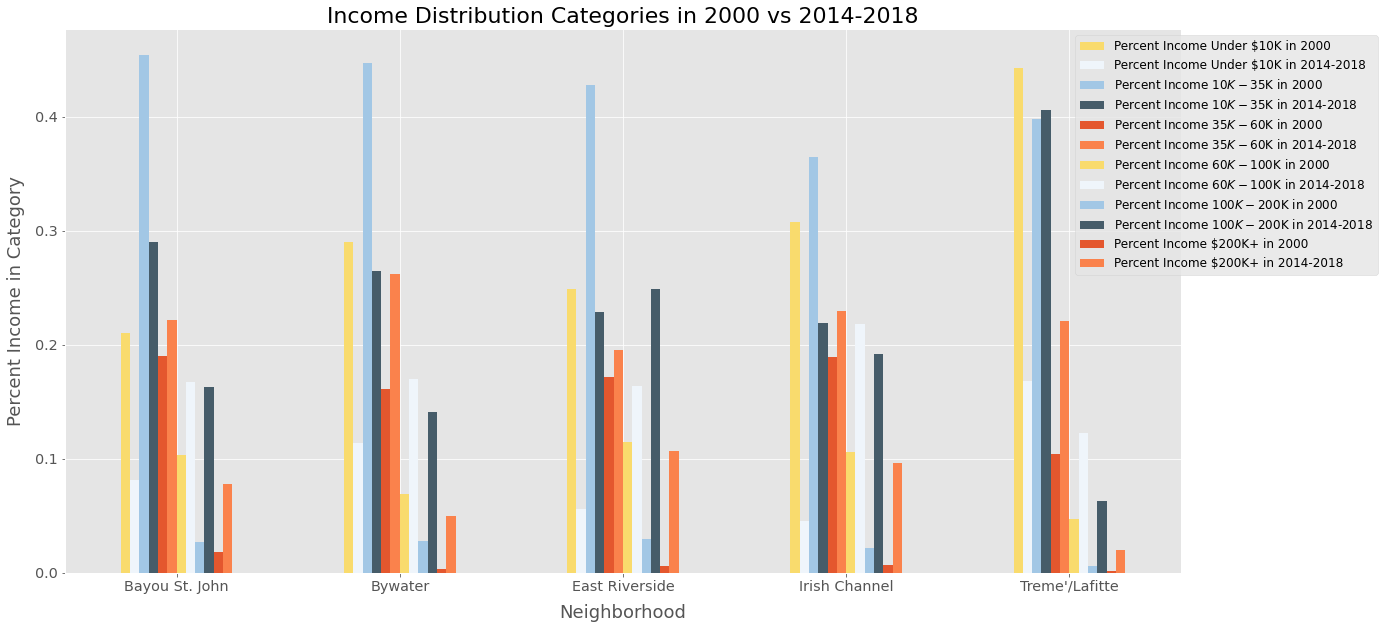

In [21]:
#Plotting these features:

#Income distribution categories in 2000 vs 2014-2018
#*Note: selected a subset of 5 neighborhoods to better view information
ax = inc_dist[inc_dist_df.Neighborhood.isin(highest_change[:5])][inc_dist_col].plot.bar(
    x='Neighborhood', rot=0, figsize=(20,10), color=theme2, fontsize='x-large')

ax.set_title('Income Distribution Categories in 2000 vs 2014-2018', fontsize=22)
ax.set_xlabel('Neighborhood', labelpad=10, fontsize=18)
ax.set_ylabel('Percent Income in Category', labelpad=10, fontsize=18)
ax.legend(bbox_to_anchor=(.9, 1), fontsize=12)


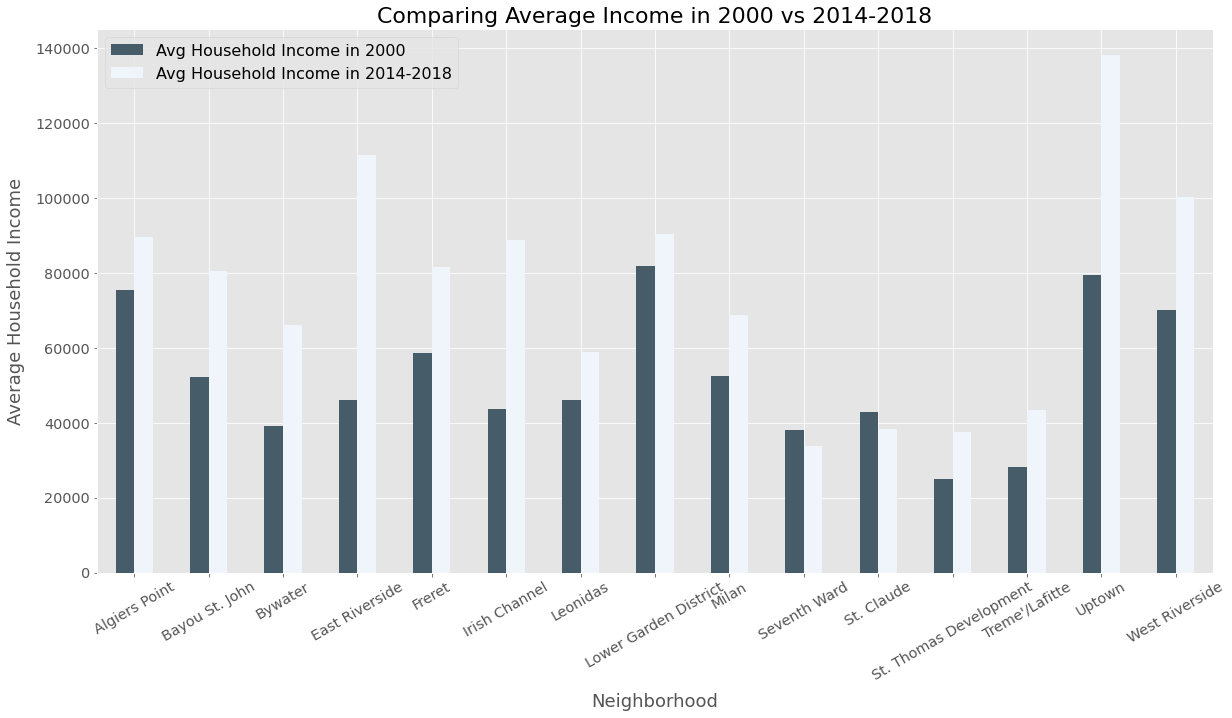

In [22]:
rand.shuffle(theme2)

#Comparing average income in 2000 vs 2014-2018
ax = avg_income_df[avg_income_df.Neighborhood.isin(highest_change)].plot.bar(
    x='Neighborhood', rot=30, figsize=(20,10), color=theme2, fontsize='x-large')

ax.set_title('Comparing Average Income in 2000 vs 2014-2018', fontsize=22)
ax.set_xlabel('Neighborhood', labelpad=10, fontsize=18)
ax.set_ylabel('Average Household Income', labelpad=10, fontsize=18)
ax.legend(fontsize=16)

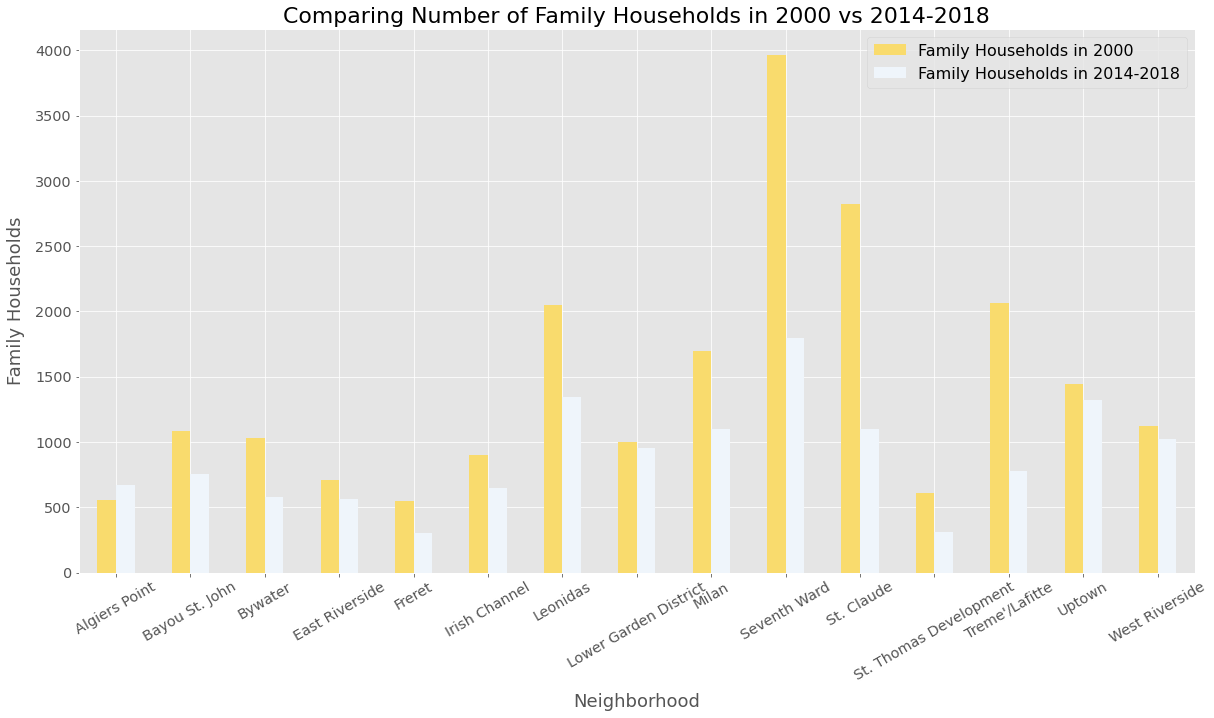

In [23]:
rand.shuffle(theme2)

#Comparing household types in 2000 vs 2014-2018
ax = household[household.Neighborhood.isin(highest_change)][['Neighborhood','Family Households in 2000',
                                    'Family Households in 2014-2018']].plot.bar(
    x='Neighborhood', rot=30, figsize=(20,10), color=theme2, fontsize='x-large')

ax.set_title('Comparing Number of Family Households in 2000 vs 2014-2018', fontsize=22)
ax.set_xlabel('Neighborhood', labelpad=10, fontsize=18)
ax.set_ylabel('Family Households', labelpad=10, fontsize=18)
ax.legend(fontsize=16)

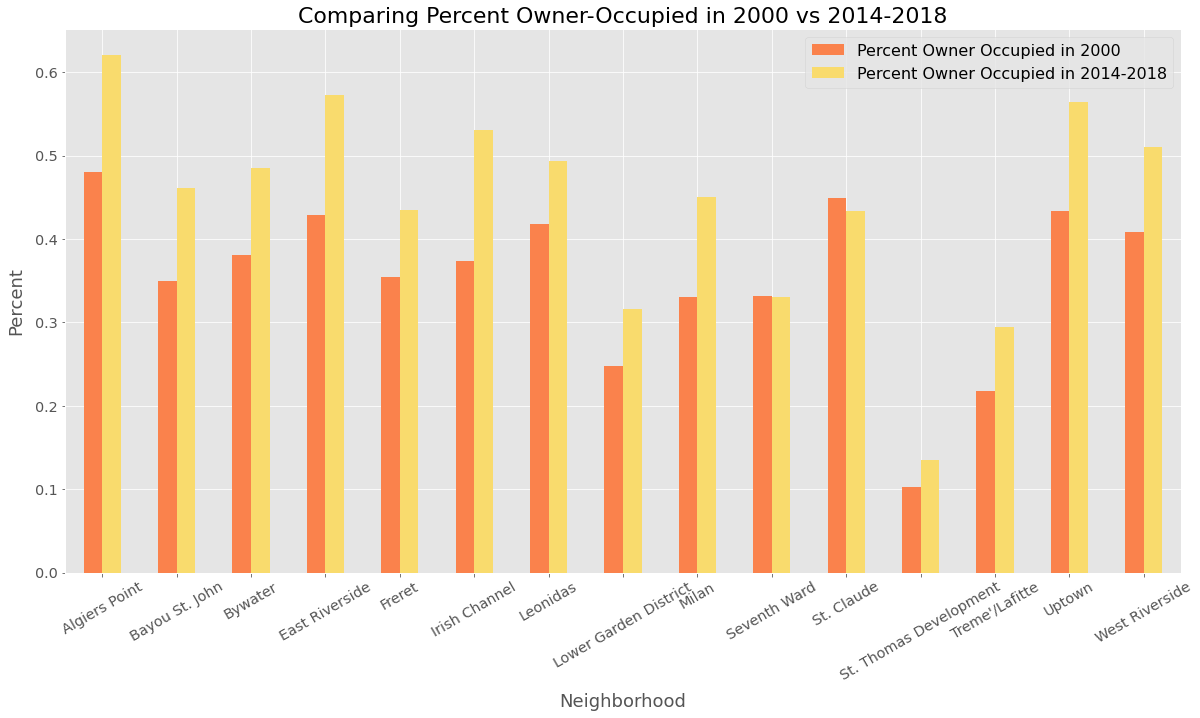

In [24]:
rand.shuffle(theme2)

#Comparing renter-occupied vs owner-occupied in 2000 vs 2014-2018
ax = rent_own_df[rent_own_df.Neighborhood.isin(highest_change)][['Neighborhood',
       'Percent Owner Occupied in 2000', 'Percent Owner Occupied in 2014-2018',]].plot.bar(
    x='Neighborhood', rot=30, figsize=(20,10), color=theme2, fontsize='x-large')

ax.set_title('Comparing Percent Owner-Occupied in 2000 vs 2014-2018', fontsize=22)
ax.set_xlabel('Neighborhood', labelpad=10, fontsize=18)
ax.set_ylabel('Percent', labelpad=10, fontsize=18)
ax.legend(fontsize=16)

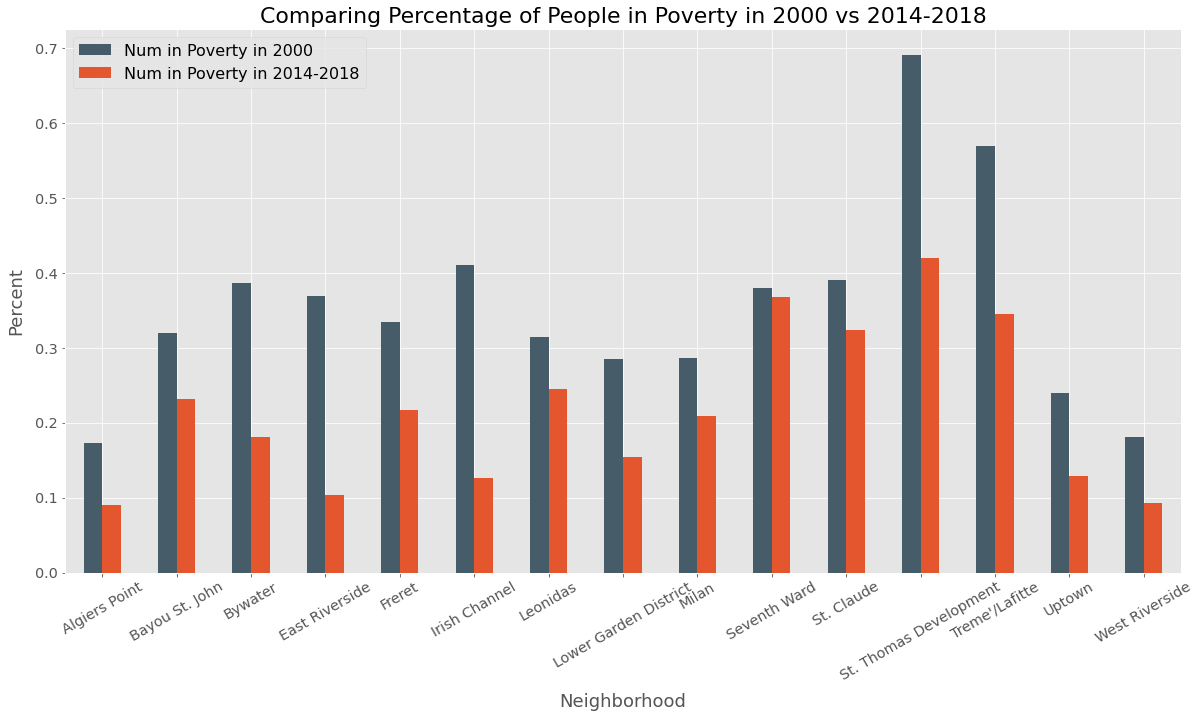

In [25]:
rand.shuffle(theme2)

#Comparing number in poverty in 2000 vs 2014-2018
ax = pov_df[pov_df.Neighborhood.isin(highest_change)][['Neighborhood',
                    "Num in Poverty in 2000", "Num in Poverty in 2014-2018"
                                ]].plot.bar(
    x='Neighborhood', rot=30, figsize=(20,10), color=theme2, fontsize='x-large')

ax.set_title('Comparing Percentage of People in Poverty in 2000 vs 2014-2018', fontsize=22)
ax.set_xlabel('Neighborhood', labelpad=10, fontsize=18)
ax.set_ylabel('Percent', labelpad=10, fontsize=18)
ax.legend(fontsize=16)


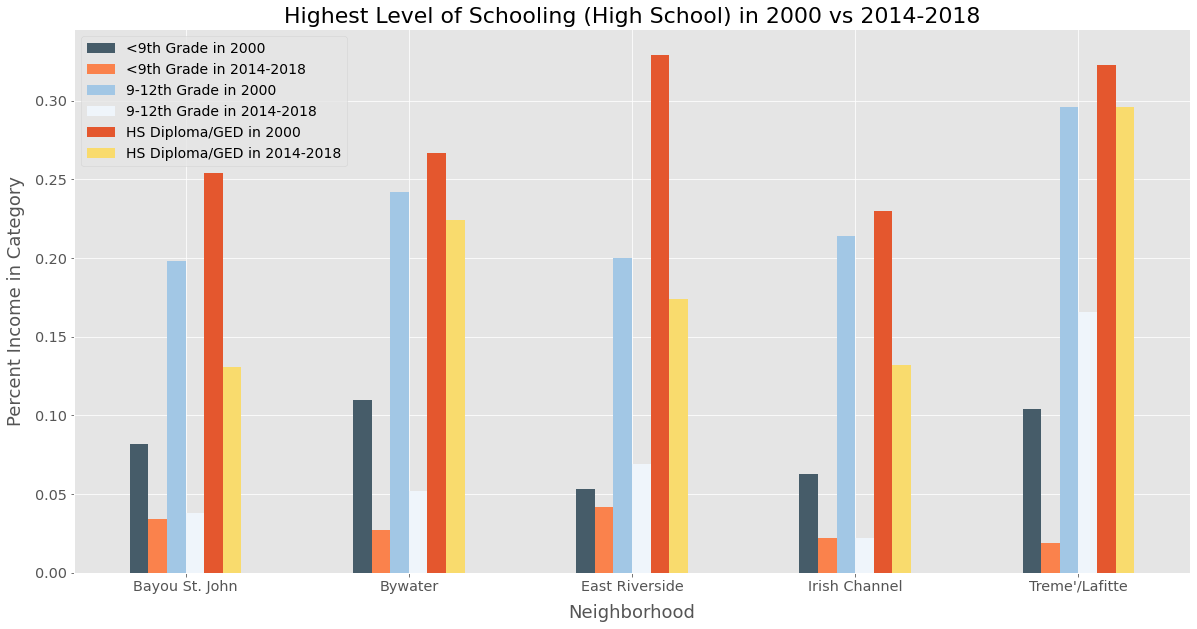

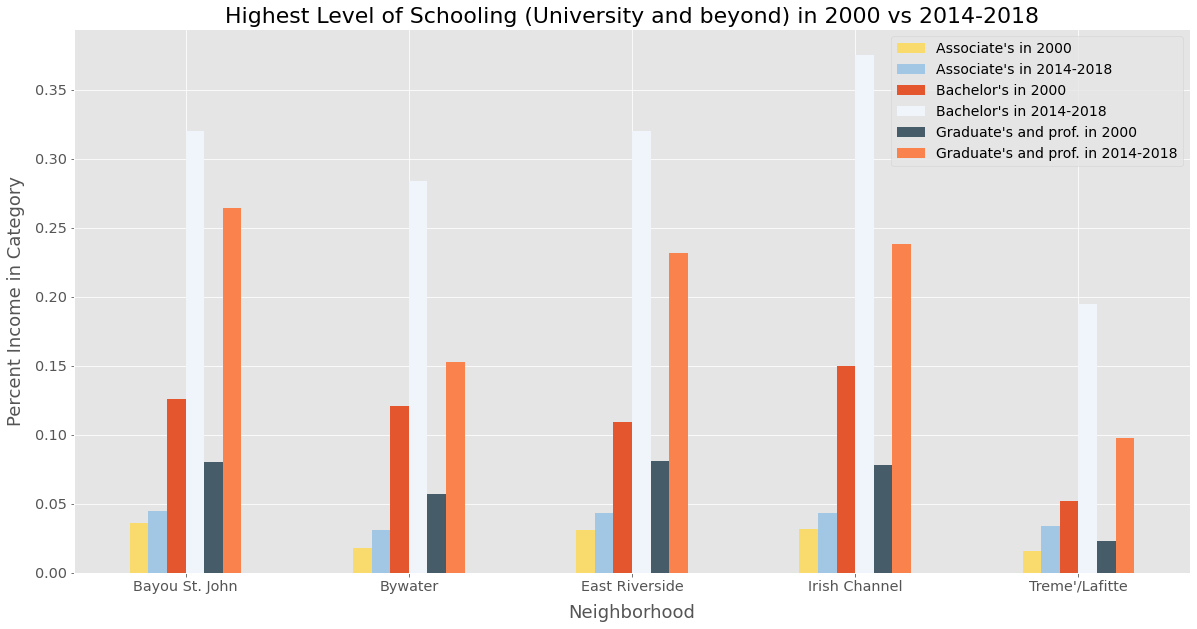

In [26]:
rand.shuffle(theme2)

#Comparing highest level of schooling in 2000 vs 2014-2018
#*Note: selected a subset of 5 neighborhoods to better view information
ax1 = school_df_hs[school_df_hs.Neighborhood.isin(highest_change[:5])].plot.bar(
    x='Neighborhood', rot=0, figsize=(20,10), color=theme2, fontsize='x-large')

ax1.set_title('Highest Level of Schooling (High School) in 2000 vs 2014-2018', fontsize=22)
ax1.set_xlabel('Neighborhood', labelpad=10, fontsize=18)
ax1.set_ylabel('Percent Income in Category', labelpad=10, fontsize=18)
ax1.legend(fontsize=14)

rand.shuffle(theme2)

ax2 = school_df_uni[school_df_uni.Neighborhood.isin(highest_change[:5])].plot.bar(
    x='Neighborhood', rot=0, figsize=(20,10), color=theme2, fontsize='x-large')

ax2.set_title('Highest Level of Schooling (University and beyond) in 2000 vs 2014-2018', fontsize=22)
ax2.set_xlabel('Neighborhood', labelpad=10, fontsize=18)
ax2.set_ylabel('Percent Income in Category', labelpad=10, fontsize=18)
ax2.legend(fontsize=14)



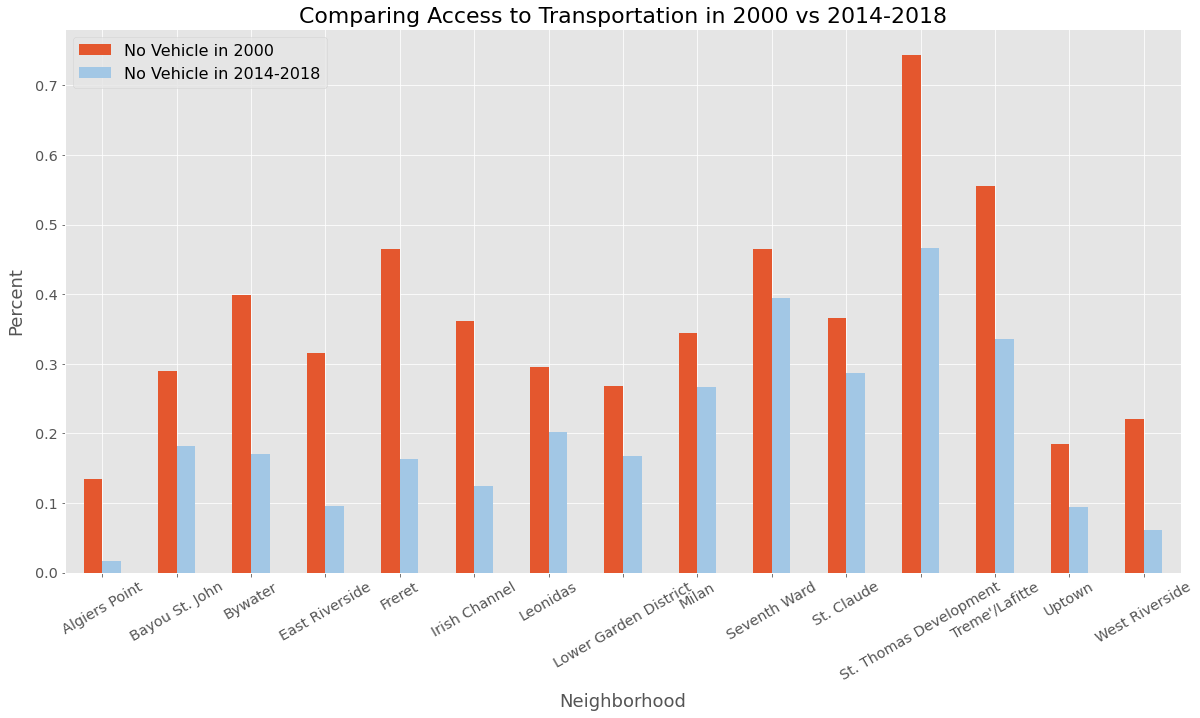

In [27]:
rand.shuffle(theme2)

#Comparing access to transportation in 2000 vs 2014-2018
ax = transport[transport.Neighborhood.isin(highest_change)][['Neighborhood', "No Vehicle in 2000", 
                                        "No Vehicle in 2014-2018"]].plot.bar(x='Neighborhood', rot=30, 
                                                figsize=(20,10), color=theme2, fontsize='x-large')

ax.set_title('Comparing Access to Transportation in 2000 vs 2014-2018', fontsize=22)
ax.set_xlabel('Neighborhood', labelpad=10, fontsize=18)
ax.set_ylabel('Percent', labelpad=10, fontsize=18)
ax.legend(fontsize=16)

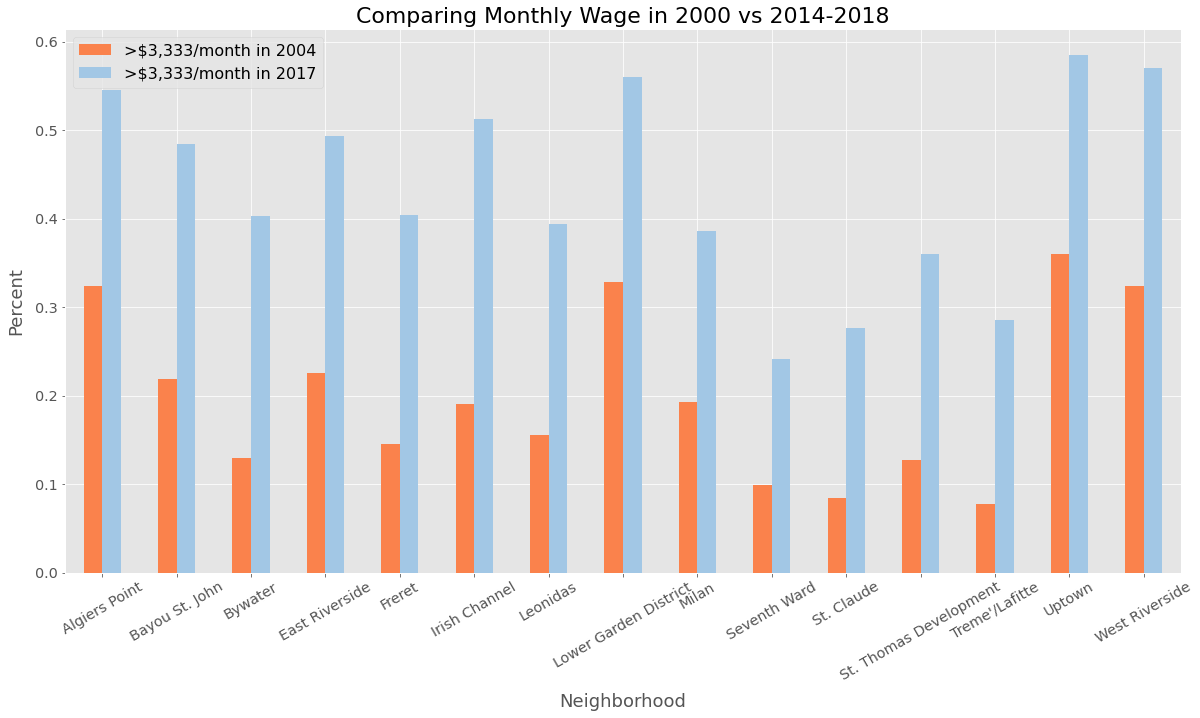

In [28]:
rand.shuffle(theme2)

#Comparing monthly wage in 2000 vs 2014-2018
ax = wage[wage.Neighborhood.isin(highest_change)][['Neighborhood', '>$3,333/month in 2004', 
                                    '>$3,333/month in 2017']].plot.bar(
    x='Neighborhood', rot=30, figsize=(20,10), color=theme2, fontsize='x-large')

ax.set_title('Comparing Monthly Wage in 2000 vs 2014-2018', fontsize=22)
ax.set_xlabel('Neighborhood', labelpad=10, fontsize=18)
ax.set_ylabel('Percent', labelpad=10, fontsize=18)
ax.legend(fontsize=16)


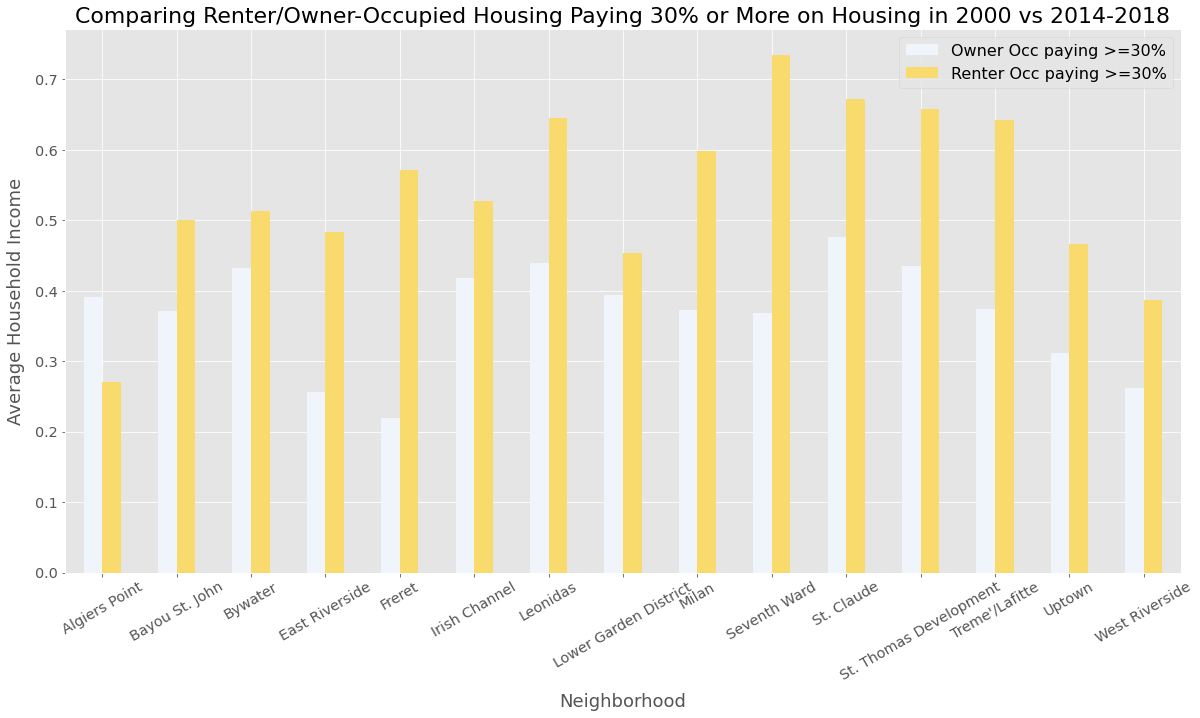

In [29]:
rand.shuffle(theme2)

#Comparing percent of income spent on housing in 2000 vs 2014-2018
ax = pct_on_housing[pov_df.Neighborhood.isin(highest_change)].plot.bar(
    x='Neighborhood', rot=30, figsize=(20,10), color=theme2, fontsize='x-large')

ax.set_title(
    'Comparing Renter/Owner-Occupied Housing Paying 30% or More on Housing in 2000 vs 2014-2018', 
                                                                                        fontsize=22)
ax.set_xlabel('Neighborhood', labelpad=10, fontsize=18)
ax.set_ylabel('Average Household Income', labelpad=10, fontsize=18)
ax.legend(fontsize=16)